# Country greenhouse gas emissions from the non-renewable fraction of woodfuel used in households in non-developed countries

##### This analysis explores:
##### - The greenhouse gas emissions from the non-renewable fraction of woodfuel used in households per world region per year for carbone dioxide (CO2), methane (CH4), nitous oxide (N2O) and the CO2 equivalent (AR5)
##### - For year 2019 correlates gas emissions per country with GPD

##### Dataset from: [![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.7310933.svg)](https://doi.org/10.5281/zenodo.7310933)

### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.stats import iqr
import seaborn as sns
import scipy as sp

### Import df

In [2]:
gas_emissions_df = pd.read_csv('D:\\Documentos\\Mine\\DC_python\\Practice\\Gas_emissions\\nrbwoodfuel_emissions.csv'\
                               , index_col = 0)

### Explore df

In [3]:
print(gas_emissions_df.shape)

print(gas_emissions_df.info())

print(gas_emissions_df.head)

(13864, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13864 entries, 1 to 13864
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AreaName     13864 non-null  object 
 1   ISO3         13800 non-null  object 
 2   ItemName     13864 non-null  object 
 3   ElementName  13864 non-null  object 
 4   Year         13864 non-null  int64  
 5   Value        13864 non-null  float64
 6   Unit         13864 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 866.5+ KB
None
<bound method NDFrame.head of           AreaName ISO3                                    ItemName  \
1      Afghanistan  AFG  Non-renewable Household Woodfuel Emissions   
2      Afghanistan  AFG  Non-renewable Household Woodfuel Emissions   
3      Afghanistan  AFG  Non-renewable Household Woodfuel Emissions   
4      Afghanistan  AFG  Non-renewable Household Woodfuel Emissions   
5      Afghanistan  AFG  Non-renewable Household 

### Explore countries and classify them by world region

In [4]:
print(gas_emissions_df["AreaName"].unique())

# Create dictionary with countries per region
Regions = {"Africa": ["Algeria", "Angola", "Botswana", "Burundi", "Cameroon", "Cabo Verde", "Central African Republic", \
                      "Chad", "Comoros", "Mayotte", "Congo", "Democratic Republic of the Congo", "Benin", "Ethiopia", \
                      "Eritrea","Djibouti", "Gabon", "Gambia", "Ghana", "Guinea", "Côte d'Ivoire", "Kenya", "Lesotho", \
                      "Liberia", "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", \
                      "Mozambique", "Namibia", "Niger", "Nigeria", "Guinea-Bissau", "Réunion", "Rwanda", "Saint Helena", \
                      "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", \
                      "Zimbabwe", "South Sudan", "Sudan", "Eswatini", "Togo", "Tunisia", "Uganda", "Egypt", \
                      "United Republic of Tanzania", "Burkina Faso", "Zambia"],
           "Central America and the Caribbean": ["Mexico", "Antigua and Barbuda", "Belize", "British Virgin Islands", \
                                                 "Costa Rica", "Cuba", "Dominica", "Dominican Republic", "El Salvador", \
                                                 "Equatorial Guinea", "Grenada", "Guadeloupe", "Guatemala", "Haiti", \
                                                 "Honduras", "Jamaica", "Curaçao", "Aruba", "Sint Maarten (Dutch part)", \
                                                 "Bonaire, Sint Eustatius and Saba", "Nicaragua", "Panama", \
                                                 "Saint Kitts and Nevis", "Anguilla", "Saint Lucia", \
                                                 "Saint Vincent and the Grenadines", "Trinidad and Tobago", \
                                                 "Turks and Caicos Islands"],
           "South America": ["Argentina", "Bolivia (Plurinational State of)", "Brazil", "Chile", "Colombia", "Ecuador", \
                             "Falkland Islands (Malvinas)", "French Guiana", "Guyana", "Paraguay", "Peru", "Suriname", \
                             "Uruguay", "Venezuela (Bolivarian Republic of)"],
           "Eastern Asia": ["China", "Republic of Korea", "China, Macao Special Administrative Region", "Mongolia"],
           "Southern Asia": ["Afghanistan", "Bangladesh", "Bhutan", "Sri Lanka", "India", "Iran (Islamic Republic of)", \
                             "Maldives", "Nepal", "Pakistan"],
           "South-Eastern Asia": ["Brunei Darussalam", "Myanmar", "Cambodia", "Indonesia", \
                                  "Lao People's Democratic Republic", "Malaysia", "Philippines", "Timor-Leste", \
                                  "Viet Nam"],
           "Oceania": ["Solomon Islands", "Fiji", "New Caledonia", "Vanuatu", "Papua New Guinea"]}

# Swap keys
d = {k: oldk for oldk, oldv in Regions.items() for k in oldv}

# Add region column
gas_emissions_df["Region"] = gas_emissions_df["AreaName"].map(d)

print(gas_emissions_df.head())

# Identify entries in the dictionary of regions that need to be corrected (remove missing values)
print(gas_emissions_df.isna().any())
print(gas_emissions_df[gas_emissions_df["Region"].isnull() == True])

['Afghanistan' 'Algeria' 'Angola' 'Antigua and Barbuda' 'Argentina'
 'Bangladesh' 'Bhutan' 'Bolivia (Plurinational State of)' 'Botswana'
 'Brazil' 'Belize' 'Solomon Islands' 'British Virgin Islands'
 'Brunei Darussalam' 'Myanmar' 'Burundi' 'Cambodia' 'Cameroon'
 'Cabo Verde' 'Central African Republic' 'Sri Lanka' 'Chad' 'Chile'
 'China' 'Colombia' 'Comoros' 'Mayotte' 'Congo'
 'Democratic Republic of the Congo' 'Costa Rica' 'Cuba' 'Benin' 'Dominica'
 'Dominican Republic' 'Ecuador' 'El Salvador' 'Equatorial Guinea'
 'Ethiopia' 'Eritrea' 'Falkland Islands (Malvinas)' 'Fiji' 'French Guiana'
 'Djibouti' 'Gabon' 'Gambia' 'Ghana' 'Grenada' 'Guadeloupe' 'Guatemala'
 'Guinea' 'Guyana' 'Haiti' 'Honduras' 'India' 'Indonesia'
 'Iran (Islamic Republic of)' "Côte d'Ivoire" 'Jamaica' 'Kenya'
 'Republic of Korea' "Lao People's Democratic Republic" 'Lesotho'
 'Liberia' 'Libya' 'China, Macao Special Administrative Region'
 'Madagascar' 'Malawi' 'Malaysia' 'Maldives' 'Mali' 'Mauritania'
 'Mauritius' 'Mex


### Subset by type of gas

In [5]:
CO2_df = gas_emissions_df[gas_emissions_df["ElementName"] == "Emissions (CO2)"]
print(CO2_df.head)

CH4_df = gas_emissions_df[gas_emissions_df["ElementName"] == "Emissions (CH4)"]
print(CH4_df.head)

N2O_df = gas_emissions_df[gas_emissions_df["ElementName"] == "Emissions (N2O)"]
print(N2O_df.head)

CO2_eq_df = gas_emissions_df[gas_emissions_df["ElementName"] == "Emissions (CO2eq) (AR5)"]
print(CO2_eq_df.head)

<bound method NDFrame.head of           AreaName ISO3                                    ItemName  \
1      Afghanistan  AFG  Non-renewable Household Woodfuel Emissions   
5      Afghanistan  AFG  Non-renewable Household Woodfuel Emissions   
9      Afghanistan  AFG  Non-renewable Household Woodfuel Emissions   
13     Afghanistan  AFG  Non-renewable Household Woodfuel Emissions   
17     Afghanistan  AFG  Non-renewable Household Woodfuel Emissions   
...            ...  ...                                         ...   
13845       Zambia  ZMB  Non-renewable Household Woodfuel Emissions   
13849       Zambia  ZMB  Non-renewable Household Woodfuel Emissions   
13853       Zambia  ZMB  Non-renewable Household Woodfuel Emissions   
13857       Zambia  ZMB  Non-renewable Household Woodfuel Emissions   
13861       Zambia  ZMB  Non-renewable Household Woodfuel Emissions   

           ElementName  Year        Value        Unit         Region  
1      Emissions (CO2)  1991   285.076576  kil


## Explore CO2 per region and year

In [6]:
# Statistics
print(CO2_df.groupby(["Region", "Year"])["Value"].mean())
print(CO2_df.groupby(["Region", "Year"])["Value"].median())
print(CO2_df.groupby(["Region", "Year"])["Value"].min())
print(CO2_df.groupby(["Region", "Year"])["Value"].max())
print(CO2_df.groupby(["Region", "Year"])["Value"].var())
print(CO2_df.groupby(["Region", "Year"])["Value"].std())

Region         Year
Africa         1990     3803.387264
               1991     3802.988095
               1992     3892.861777
               1993     3977.411108
               1994     4804.701011
                           ...     
Southern Asia  2015    21089.121387
               2016    21026.039887
               2017    20910.659784
               2018    20787.766991
               2019    20774.713574
Name: Value, Length: 210, dtype: float64
Region         Year
Africa         1990    1027.336919
               1991    1011.969679
               1992    1074.130935
               1993    1076.563488
               1994    1096.190114
                          ...     
Southern Asia  2015    4912.884303
               2016    4912.884303
               2017    4914.931485
               2018    4914.931485
               2019    4914.931485
Name: Value, Length: 210, dtype: float64
Region         Year
Africa         1990    0.520715
               1991    0.520715
             

Text(0.5, 0.03, 'Count of kilotones of CO2 emissions \n per country/year')

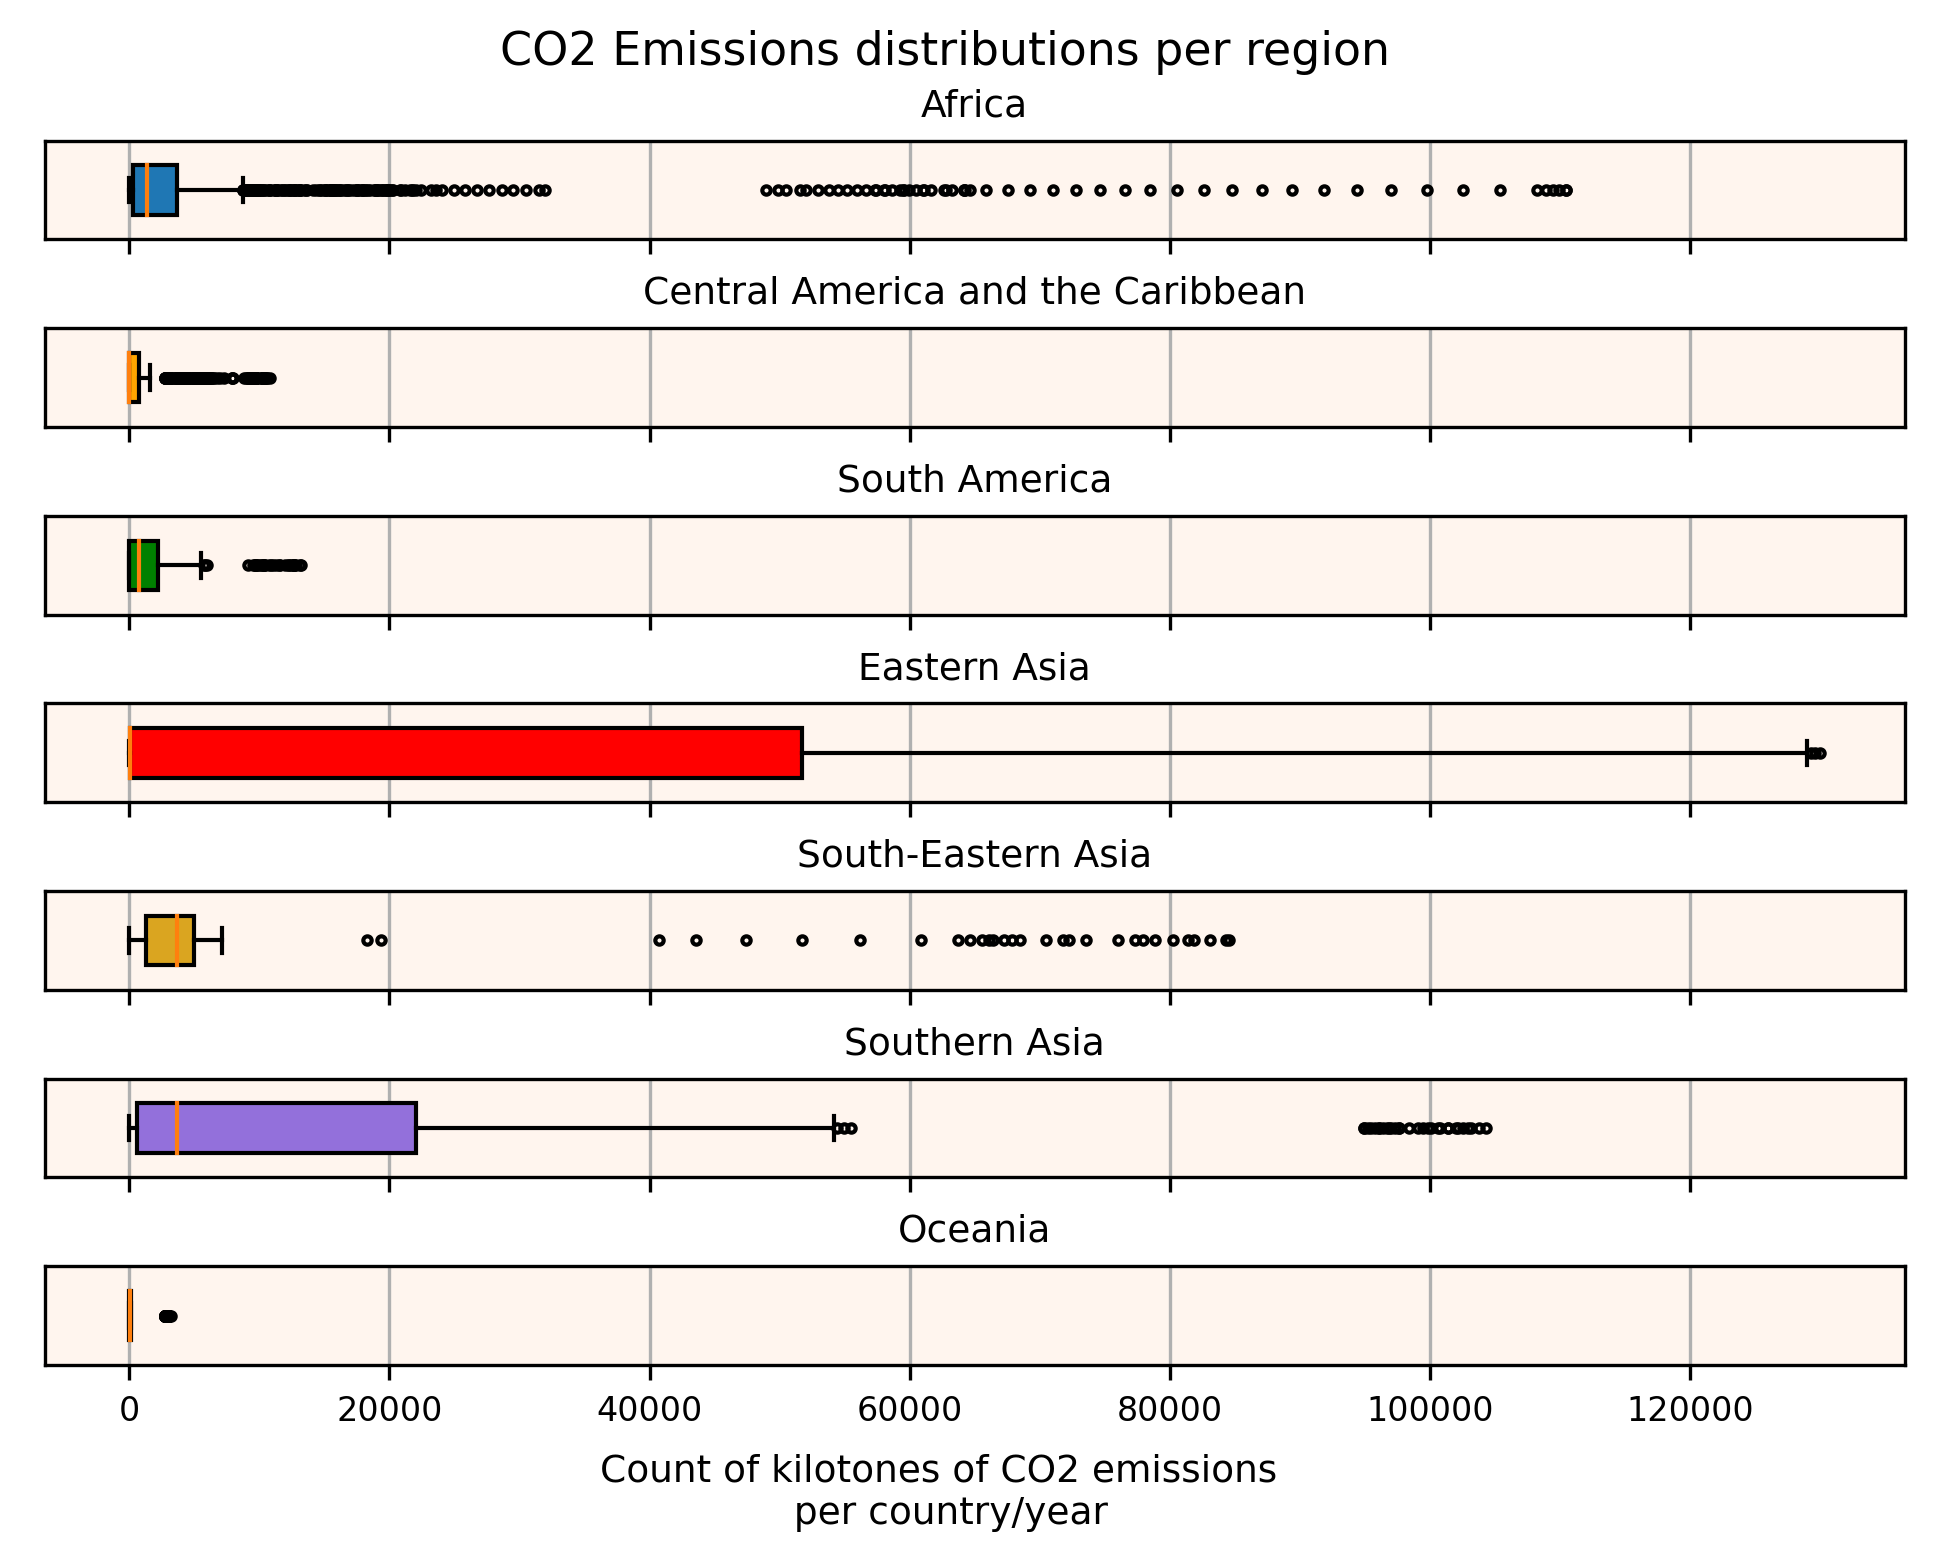

In [7]:
# Subset per region
CO2_Africa_df = CO2_df[CO2_df["Region"] == "Africa"].copy()
Africa_CO2_value_per_year = (CO2_Africa_df.groupby(["Year"])["Value"].median())

CO2_CAC_df = CO2_df[CO2_df["Region"] == "Central America and the Caribbean"].copy()
CAC_CO2_value_per_year = (CO2_CAC_df.groupby(["Year"])["Value"].median())

CO2_SAm_df = CO2_df[CO2_df["Region"] == "South America"].copy()
SAm_CO2_value_per_year = (CO2_SAm_df.groupby(["Year"])["Value"].median())

CO2_EAsia_df = CO2_df[CO2_df["Region"] == "Eastern Asia"].copy()
EAsia_CO2_value_per_year = (CO2_EAsia_df.groupby(["Year"])["Value"].median())

CO2_SEAsia_df = CO2_df[CO2_df["Region"] == "South-Eastern Asia"].copy()
SEAsia_CO2_value_per_year = (CO2_SEAsia_df.groupby(["Year"])["Value"].median())

CO2_SAsia_df = CO2_df[CO2_df["Region"] == "Southern Asia"].copy()
SAsia_CO2_value_per_year = (CO2_SAsia_df.groupby(["Year"])["Value"].median())

CO2_Oc_df = CO2_df[CO2_df["Region"] == "Oceania"].copy()
Oc_CO2_value_per_year = (CO2_Oc_df.groupby(["Year"])["Value"].median())

# Distribution boxplots per region
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] =300
plt.rcParams["figure.figsize"] = (8,5.3)
fig, ax = plt.subplots(7, 1, sharey = True, sharex= True)
#fig.gca().xtick_params(labelsize = 8)
plt.suptitle("CO2 Emissions distributions per region", fontsize=11, y= 0.95)
plt.subplots_adjust(hspace = 0.9)
                   
## Subplots 
ax[0].boxplot(CO2_Africa_df["Value"], vert=False, patch_artist=True, widths = 0.5, flierprops={'markersize': 2})
ax[0].set_title("Africa", fontsize=9)
ax[1].boxplot(CO2_CAC_df["Value"], vert=False, patch_artist=True, boxprops = dict(facecolor = "orange"), widths = 0.5, flierprops={'markersize': 2})
ax[1].set_title("Central America and the Caribbean", fontsize=9)
ax[2].boxplot(CO2_SAm_df["Value"], vert=False, patch_artist=True, boxprops = dict(facecolor = "g"), widths = 0.5, flierprops={'markersize': 2})
ax[2].set_title("South America", fontsize=9)
ax[3].boxplot(CO2_EAsia_df["Value"], vert=False, patch_artist=True, boxprops = dict(facecolor = "r"), widths = 0.5, flierprops={'markersize': 2})
ax[3].set_title("Eastern Asia", fontsize=9)
ax[4].boxplot(CO2_SEAsia_df["Value"], vert=False, patch_artist=True, boxprops = dict(facecolor = "goldenrod"), widths = 0.5, flierprops={'markersize': 2})
ax[4].set_title("South-Eastern Asia", fontsize=9)
ax[5].boxplot(CO2_SAsia_df["Value"], vert=False, patch_artist=True, boxprops = dict(facecolor = "mediumpurple"), widths = 0.5, flierprops={'markersize': 2})
ax[5].set_title("Southern Asia", fontsize=9)
ax[6].boxplot(CO2_Oc_df["Value"], vert=False, patch_artist=True, boxprops = dict(facecolor = "palevioletred"), widths = 0.5, flierprops={'markersize': 2})
ax[6].set_title("Oceania", fontsize=9)

ax_list = list(range(0, 7))

## Grid and color
for num in ax_list:
    ax[num].grid()
    ax[num].set_facecolor("seashell")
    ax[num].get_yaxis().set_visible(False)
    
for tick in ax[-1].xaxis.get_major_ticks():
    tick.label1.set_fontsize(8)
    
fig.text(0.5, 0.03, 'Count of kilotones of CO2 emissions \n per country/year', ha='center', va='center', fontsize = 9)    


**Figure 1.** Distribution of CO2 emissions per world region.

## CO2 emissions per world region across time

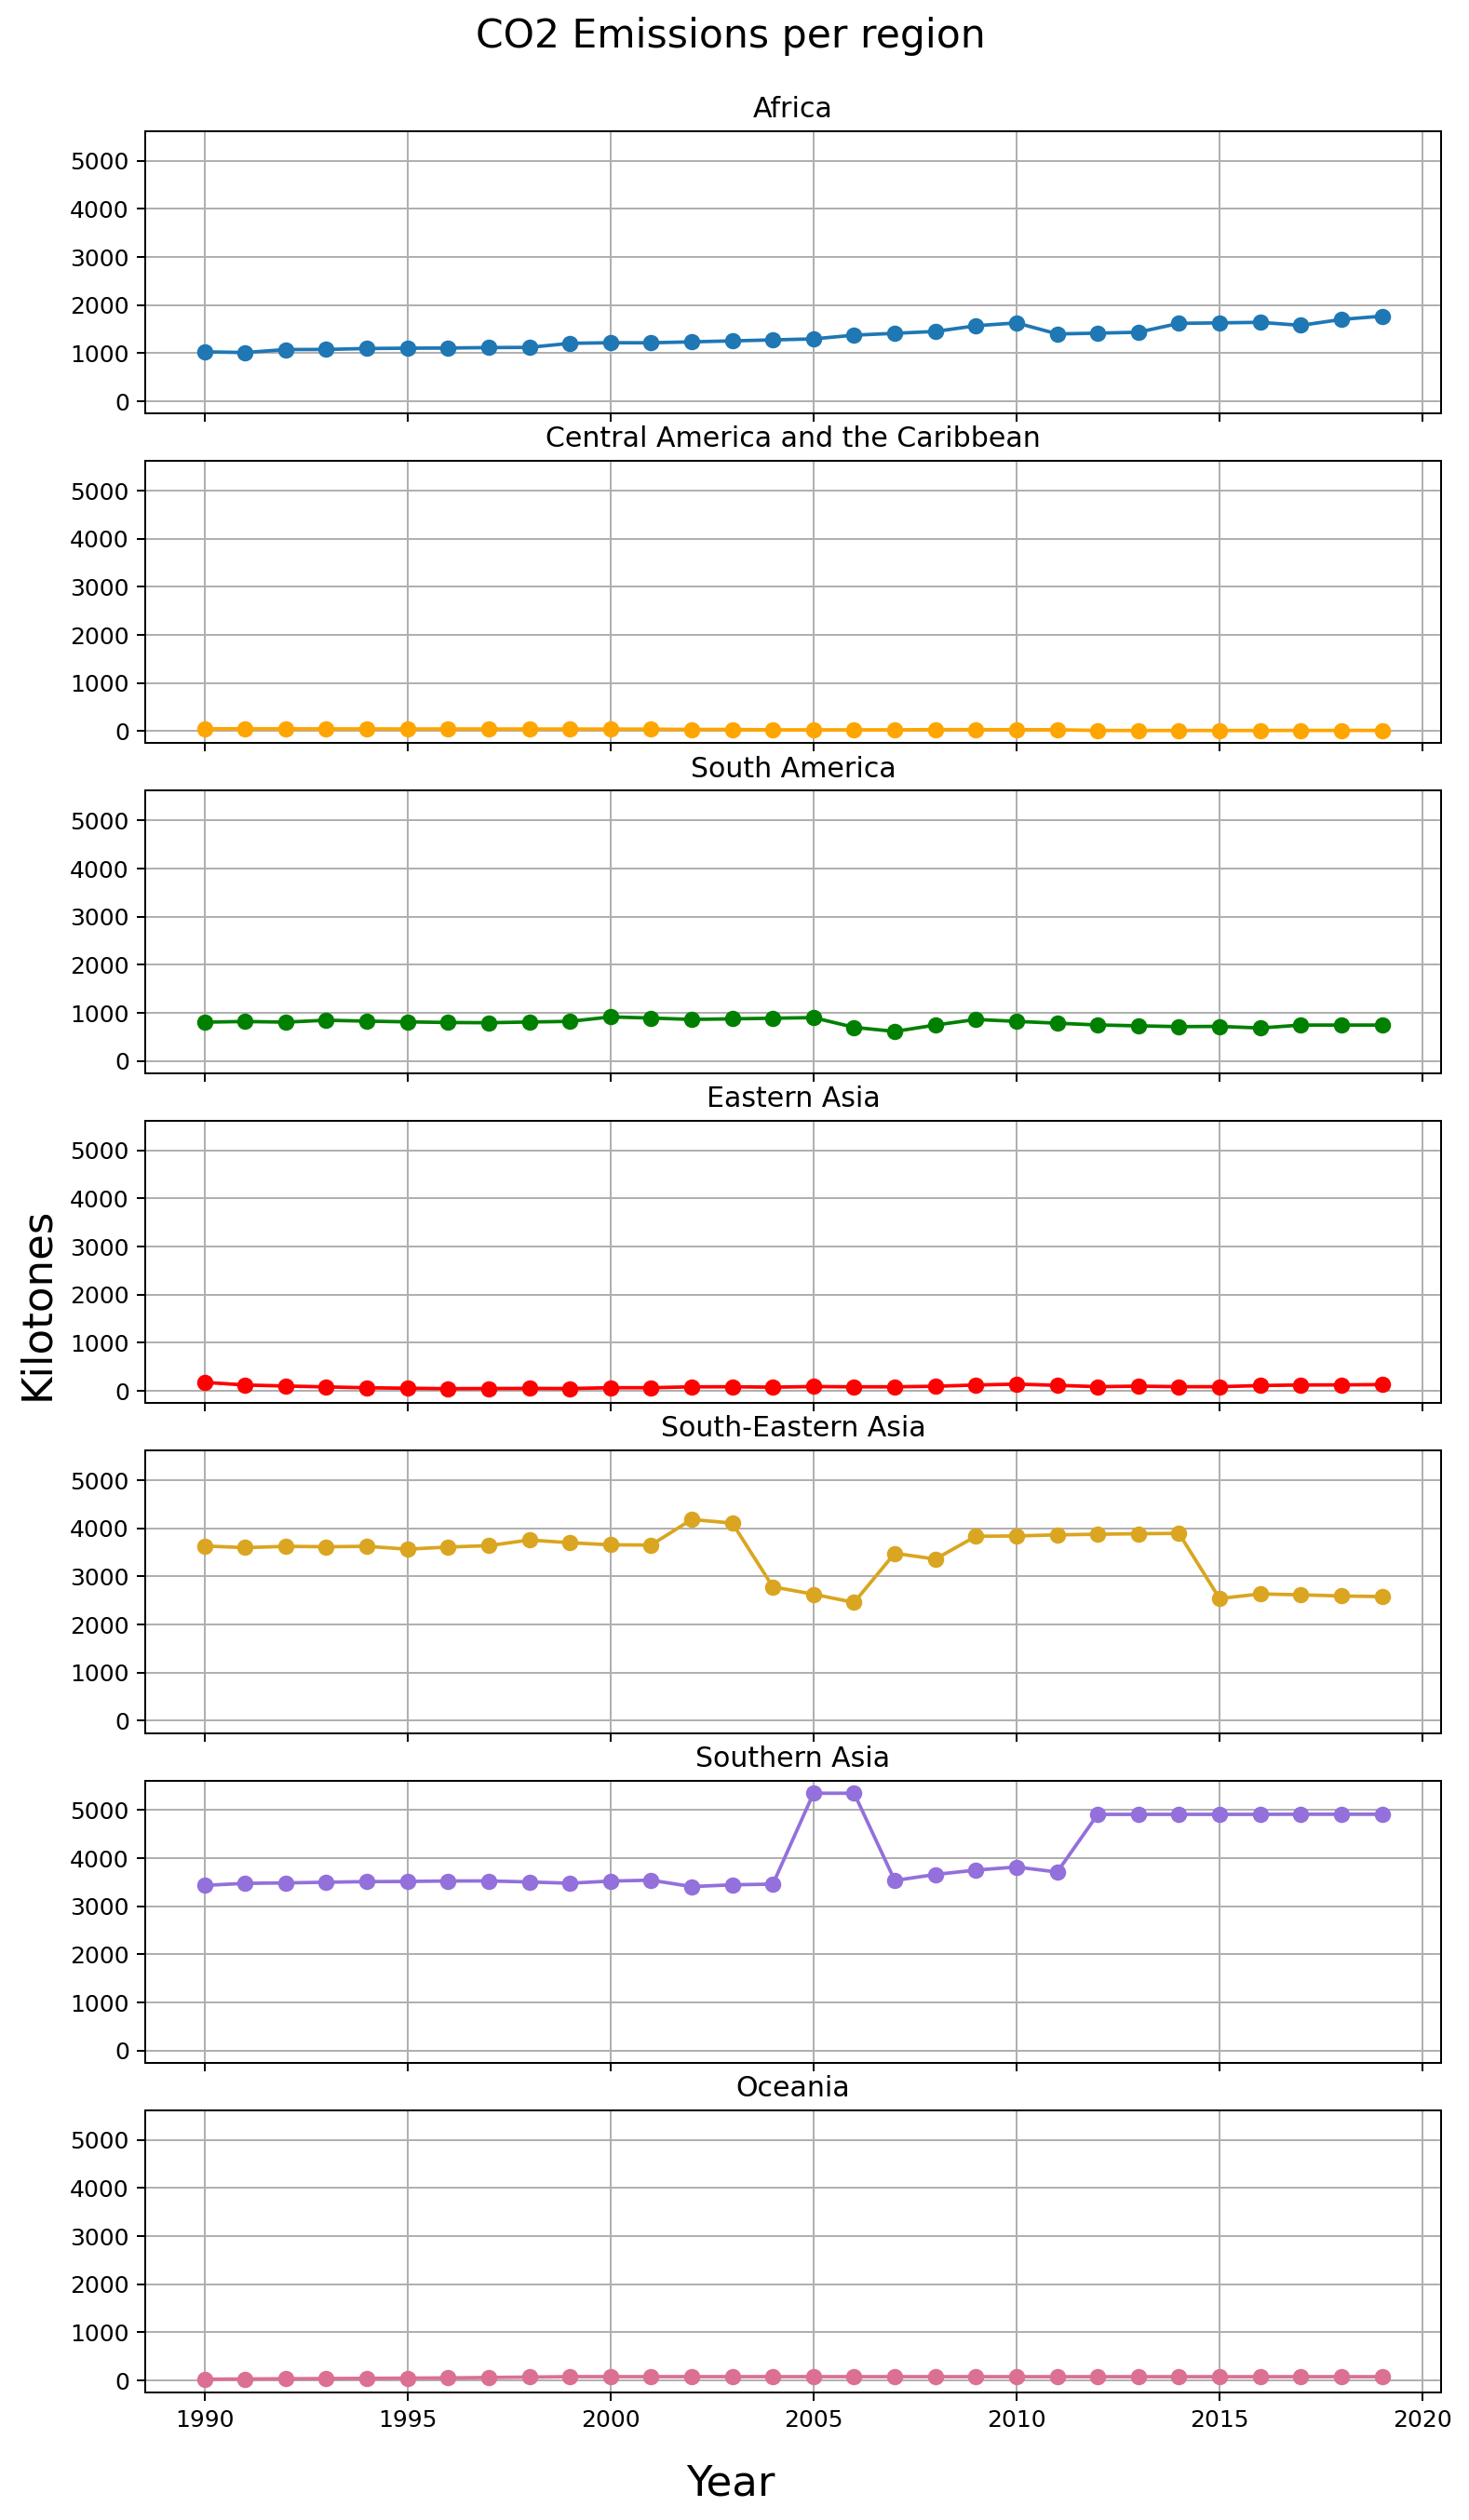

In [8]:
# Plot

## Canvas
plt.rcParams['figure.dpi'] = 180
plt.rcParams['savefig.dpi'] = 180
fig, ax = plt.subplots(7, 1, sharey = True, sharex= True, figsize=(9,16))
plt.grid()
fig.tight_layout(rect=[0.06, 0.07, 1, 0.95]) #left, bottom, right, top
fig.suptitle("CO2 Emissions per region", fontsize=17)


## Subplots 
ax[0].plot(Africa_CO2_value_per_year, marker = "o")
ax[0].set_title("Africa")
ax[1].plot(CAC_CO2_value_per_year, marker = "o", color = "orange")
ax[1].set_title("Central America and the Caribbean")
ax[2].plot(SAm_CO2_value_per_year, marker = "o", color = "g")
ax[2].set_title("South America")
ax[3].plot(EAsia_CO2_value_per_year, marker = "o", color = "r")
ax[3].set_title("Eastern Asia")
ax[4].plot(SEAsia_CO2_value_per_year, marker = "o", color = "goldenrod")
ax[4].set_title("South-Eastern Asia")
ax[5].plot(SAsia_CO2_value_per_year, marker = "o", color = "mediumpurple")
ax[5].set_title("Southern Asia")
ax[6].plot(Oc_CO2_value_per_year, marker = "o", color = "palevioletred")
ax[6].set_title("Oceania")

## Grid
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
ax[4].grid()
ax[5].grid()

## Labels
fig.text(0.5, 0.06, 'Year', ha='center', va='center', fontsize = 18)
fig.text(0.04, 0.5, 'Kilotones', ha='center', va='center', rotation='vertical', fontsize = 18)

## Print
plt.show()

**Figure 2.** Median CO2 emissions across time for each world region. According to this graph, CO2 emissions have follow four different trends across time in the last 30 years (1990-2019):
1. Low and stable emissions, as found in Central America and the Caribbean, Eastern Asia, and Oceania.
2. Moderate but duplicating emissions, found in Africa.
3. High but decreased emissions, observed in South-Eastern Asia.
4. High and increased emissions, for Southern Asia.
For trends 3 and 4, it is noted that they have been stable for the last 4 and 7 years. 

Considering Figure 1, considering the median for all countries might be misleading. For example, in Figure 2, Eastern Asia appears as a region with low emissions, but when Figure 1 is considered, the distribution of emissions is high. Thus, countries in world regions will be categorized in low- or high- emission, according to the median of the region, to explore the trend across time. 

C:\Users\baldu\AppData\Local\Temp\ipykernel_9872\765449563.py:101: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([line1, line2, line3], labels= ["Regional median", "High-emission countries median", "Low-emission countries median"], bbox_to_anchor=(0., 0.93, 0.7, .102), loc=3,)


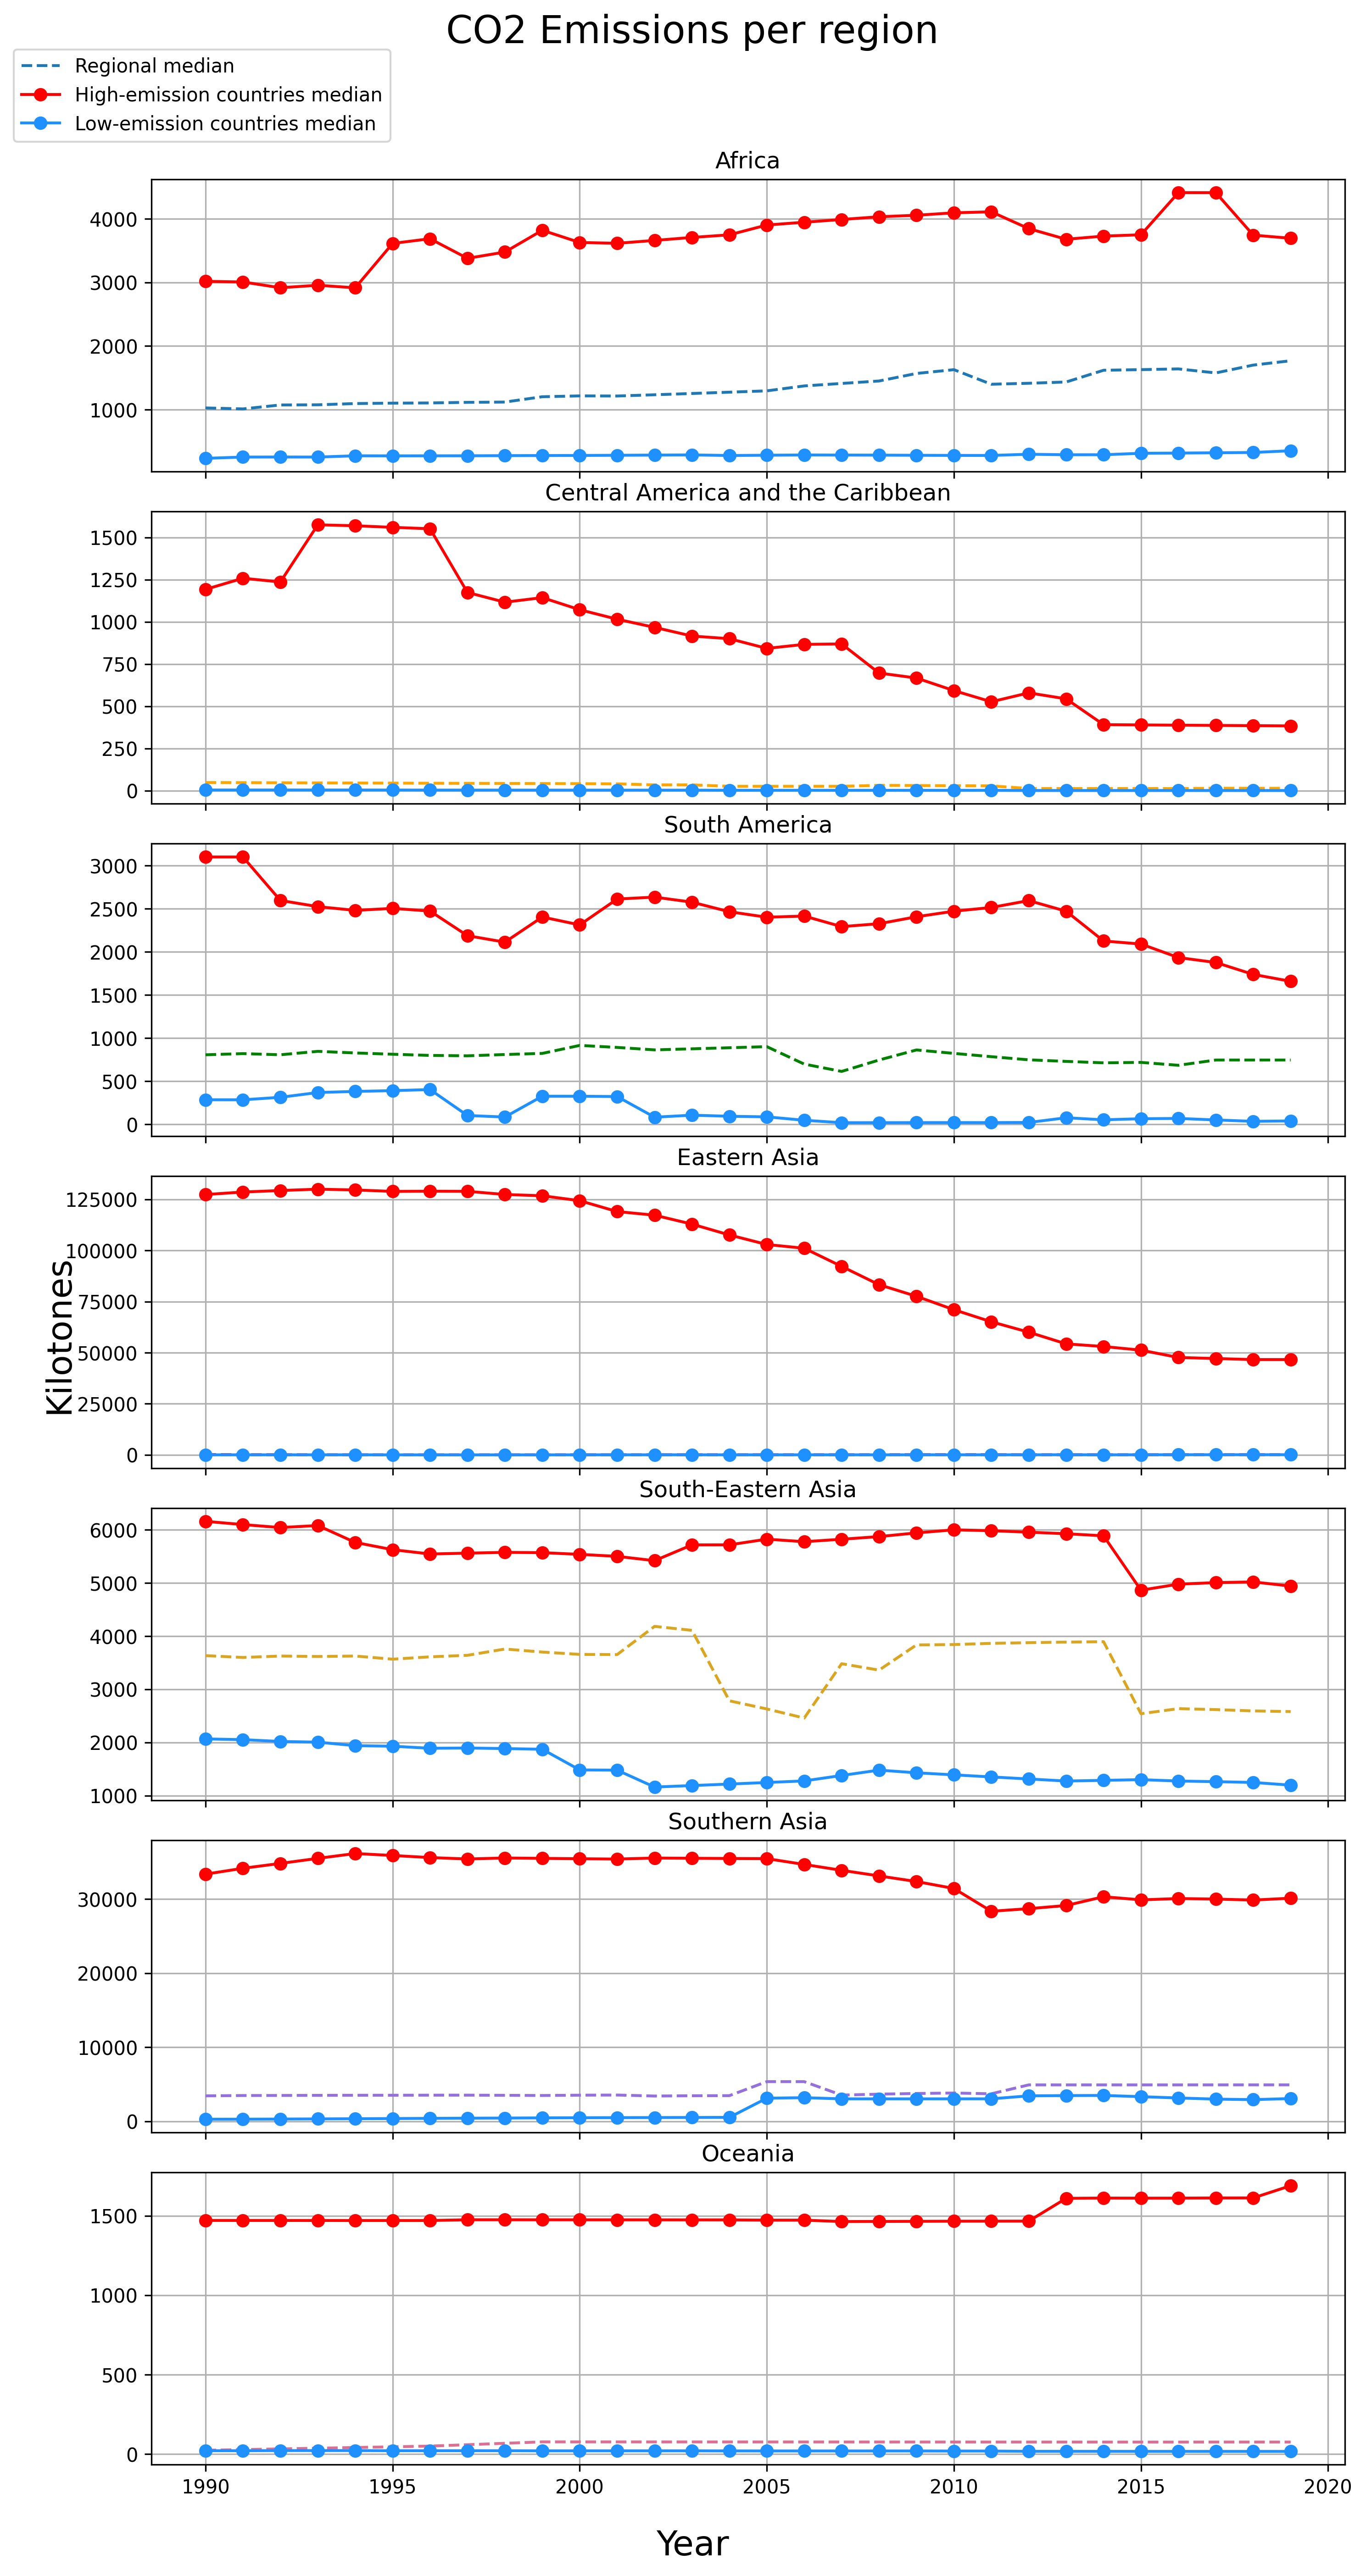

In [9]:
# Median per region across time
median_per_region_dic = CO2_df.groupby(["Region"]).apply(lambda grp: grp.groupby(["Region"])["Value"].median().to_dict()).to_dict()

## Only Africa

# Add Median per country across time to classify countries
CO2_Africa_df["Country_overall_median"] = CO2_Africa_df.groupby(["AreaName"])["Value"].transform("median")

# Add category according to median
CO2_Africa_df["Median_emission_cat"] = np.where(CO2_Africa_df["Country_overall_median"] > median_per_region_dic["Africa"]["Africa"], "High", "Low")

# Mean emissions per year for according to category
CO2_Africa_Median_emissions_year_cat_dic = CO2_Africa_df.groupby(["Median_emission_cat"]).apply(lambda grp: grp.groupby(["Year"])["Value"].median().to_dict()).to_dict()
CO2_Africa_Median_emissions_year_high_list = list(CO2_Africa_Median_emissions_year_cat_dic["High"].values())
CO2_Africa_Median_emissions_year_low_list = list(CO2_Africa_Median_emissions_year_cat_dic["Low"].values())
years_list = [*range(1990, 2020)]


## As a loop for all regions

median_per_region_dic = CO2_df.groupby(["Region"]).apply(lambda grp: grp.groupby(["Region"])["Value"].median().to_dict()).to_dict()

list_regions_dfs = [CO2_Africa_df, CO2_CAC_df, CO2_EAsia_df, CO2_Oc_df, CO2_SAm_df, CO2_SEAsia_df, CO2_SAsia_df]

# Add Median per country across time to classify countries
for region_df in list_regions_dfs :
    region_df["Country_overall_median"] = region_df.groupby(["AreaName"])["Value"].transform("median")
    
# Add category according to median    
## List medians per region    
reg_medians_list = []    
    
for dict1 in median_per_region_dic.keys() :
    for dict2 in median_per_region_dic[dict1].values() :
        reg_medians_list.append(float(dict2)) 
        
## Loop to add median to each df   
for region, median in zip(list_regions_dfs, reg_medians_list):    
    region["Median_emission_cat"] = np.where(region["Country_overall_median"] > median, "High", "Low")


list_regions_dfs_piv_high = [df.pivot_table(index = "Year", columns = "Median_emission_cat", values = "Value", aggfunc="median") for df in list_regions_dfs]        

# Plot

## Canvas
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
fig, ax = plt.subplots(7, 1, sharex= True, figsize=(10,20))
plt.grid()
fig.tight_layout(rect=[0.06, 0.07, 1, 0.93]) #left, bottom, right, top
fig.suptitle("CO2 Emissions per region", fontsize=20)

## Subplots 
line3 = ax[0].plot(Africa_CO2_value_per_year, linestyle = "--")
line1 = ax[0].plot(years_list, CO2_Africa_Median_emissions_year_high_list, marker = "o", color = "r")
line2 = ax[0].plot(years_list, CO2_Africa_Median_emissions_year_low_list, marker = "o", color = "dodgerblue")
ax[0].set_title("Africa")

ax[1].plot(CAC_CO2_value_per_year, linestyle = "--", color = "orange")
ax[1].plot(years_list, list_regions_dfs_piv_high[1]["High"], marker = "o", color = "r")
ax[1].plot(years_list, list_regions_dfs_piv_high[1]["Low"], marker = "o", color = "dodgerblue")
ax[1].set_title("Central America and the Caribbean")

ax[2].plot(SAm_CO2_value_per_year, linestyle = "--", color = "g")
ax[2].plot(years_list, list_regions_dfs_piv_high[4]["High"], marker = "o", color = "r")
ax[2].plot(years_list, list_regions_dfs_piv_high[4]["Low"], marker = "o", color = "dodgerblue")
ax[2].set_title("South America")

ax[3].plot(EAsia_CO2_value_per_year, linestyle = "--", color = "r")
ax[3].plot(years_list, list_regions_dfs_piv_high[2]["High"], marker = "o", color = "r")
ax[3].plot(years_list, list_regions_dfs_piv_high[2]["Low"], marker = "o", color = "dodgerblue")
ax[3].set_title("Eastern Asia")

ax[4].plot(SEAsia_CO2_value_per_year, linestyle = "--", color = "goldenrod")
ax[4].plot(years_list, list_regions_dfs_piv_high[5]["High"], marker = "o", color = "r")
ax[4].plot(years_list, list_regions_dfs_piv_high[5]["Low"], marker = "o", color = "dodgerblue")
ax[4].set_title("South-Eastern Asia")

ax[5].plot(SAsia_CO2_value_per_year, linestyle = "--", color = "mediumpurple")
ax[5].plot(years_list, list_regions_dfs_piv_high[6]["High"], marker = "o", color = "r")
ax[5].plot(years_list, list_regions_dfs_piv_high[6]["Low"], marker = "o", color = "dodgerblue")
ax[5].set_title("Southern Asia")

ax[6].plot(Oc_CO2_value_per_year, linestyle = "--", color = "palevioletred")
ax[6].plot(years_list, list_regions_dfs_piv_high[3]["High"], marker = "o", color = "r")
ax[6].plot(years_list, list_regions_dfs_piv_high[3]["Low"], marker = "o", color = "dodgerblue")
ax[6].set_title("Oceania")

## Grid
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()
ax[4].grid()
ax[5].grid()

## Labels
fig.text(0.5, 0.06, 'Year', ha='center', va='center', fontsize = 18)
fig.text(0.04, 0.5, 'Kilotones', ha='center', va='center', rotation='vertical', fontsize = 18)
fig.legend([line1, line2, line3], labels= ["Regional median", "High-emission countries median", "Low-emission countries median"], bbox_to_anchor=(0., 0.93, 0.7, .102), loc=3,)
## Print
plt.show()

**Figure 3.** Median CO2 emissions across time for each world region, according to low- or high-emission countries. 

We can observe that trends are different for countries according to emissions-level category and world region:

For Low-emission countries, emissions are stable in most of the world regions, except for South America, South Eastern Asia, and Southern Asia. The first two regions are decresing their emissions, while the last one is having an increase. 

For the high-emission countries, three different trends are observed:
1. High-emission for their corresponding region but moderate in a global set (>1500 and <5000 kilotones) with decreased emissions: Central America and the Caribbean, South America, and Southern Asia.
2. High-emission for their corresponding region but moderate in a global set (>1500 and <5000 kilotones) with increased emissions: Africa and Oceania.
3. High-emission for their corresponding region and in a global set (>5000 kilotones) with decreased emissions: Eastern and Sout-Eastern Asia.

## Correlation between GDP per capita and CO2 emissions in 2019 for Countries in America

C:\Users\baldu\AppData\Local\Temp\ipykernel_9872\1261822908.py:26: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  CO2_Am_2019_df["GDP"] = CO2_Am_2019_df["GDP"].str.replace("[","")
C:\Users\baldu\AppData\Local\Temp\ipykernel_9872\1261822908.py:27: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  CO2_Am_2019_df["GDP"] = CO2_Am_2019_df["GDP"].str.replace("]","")


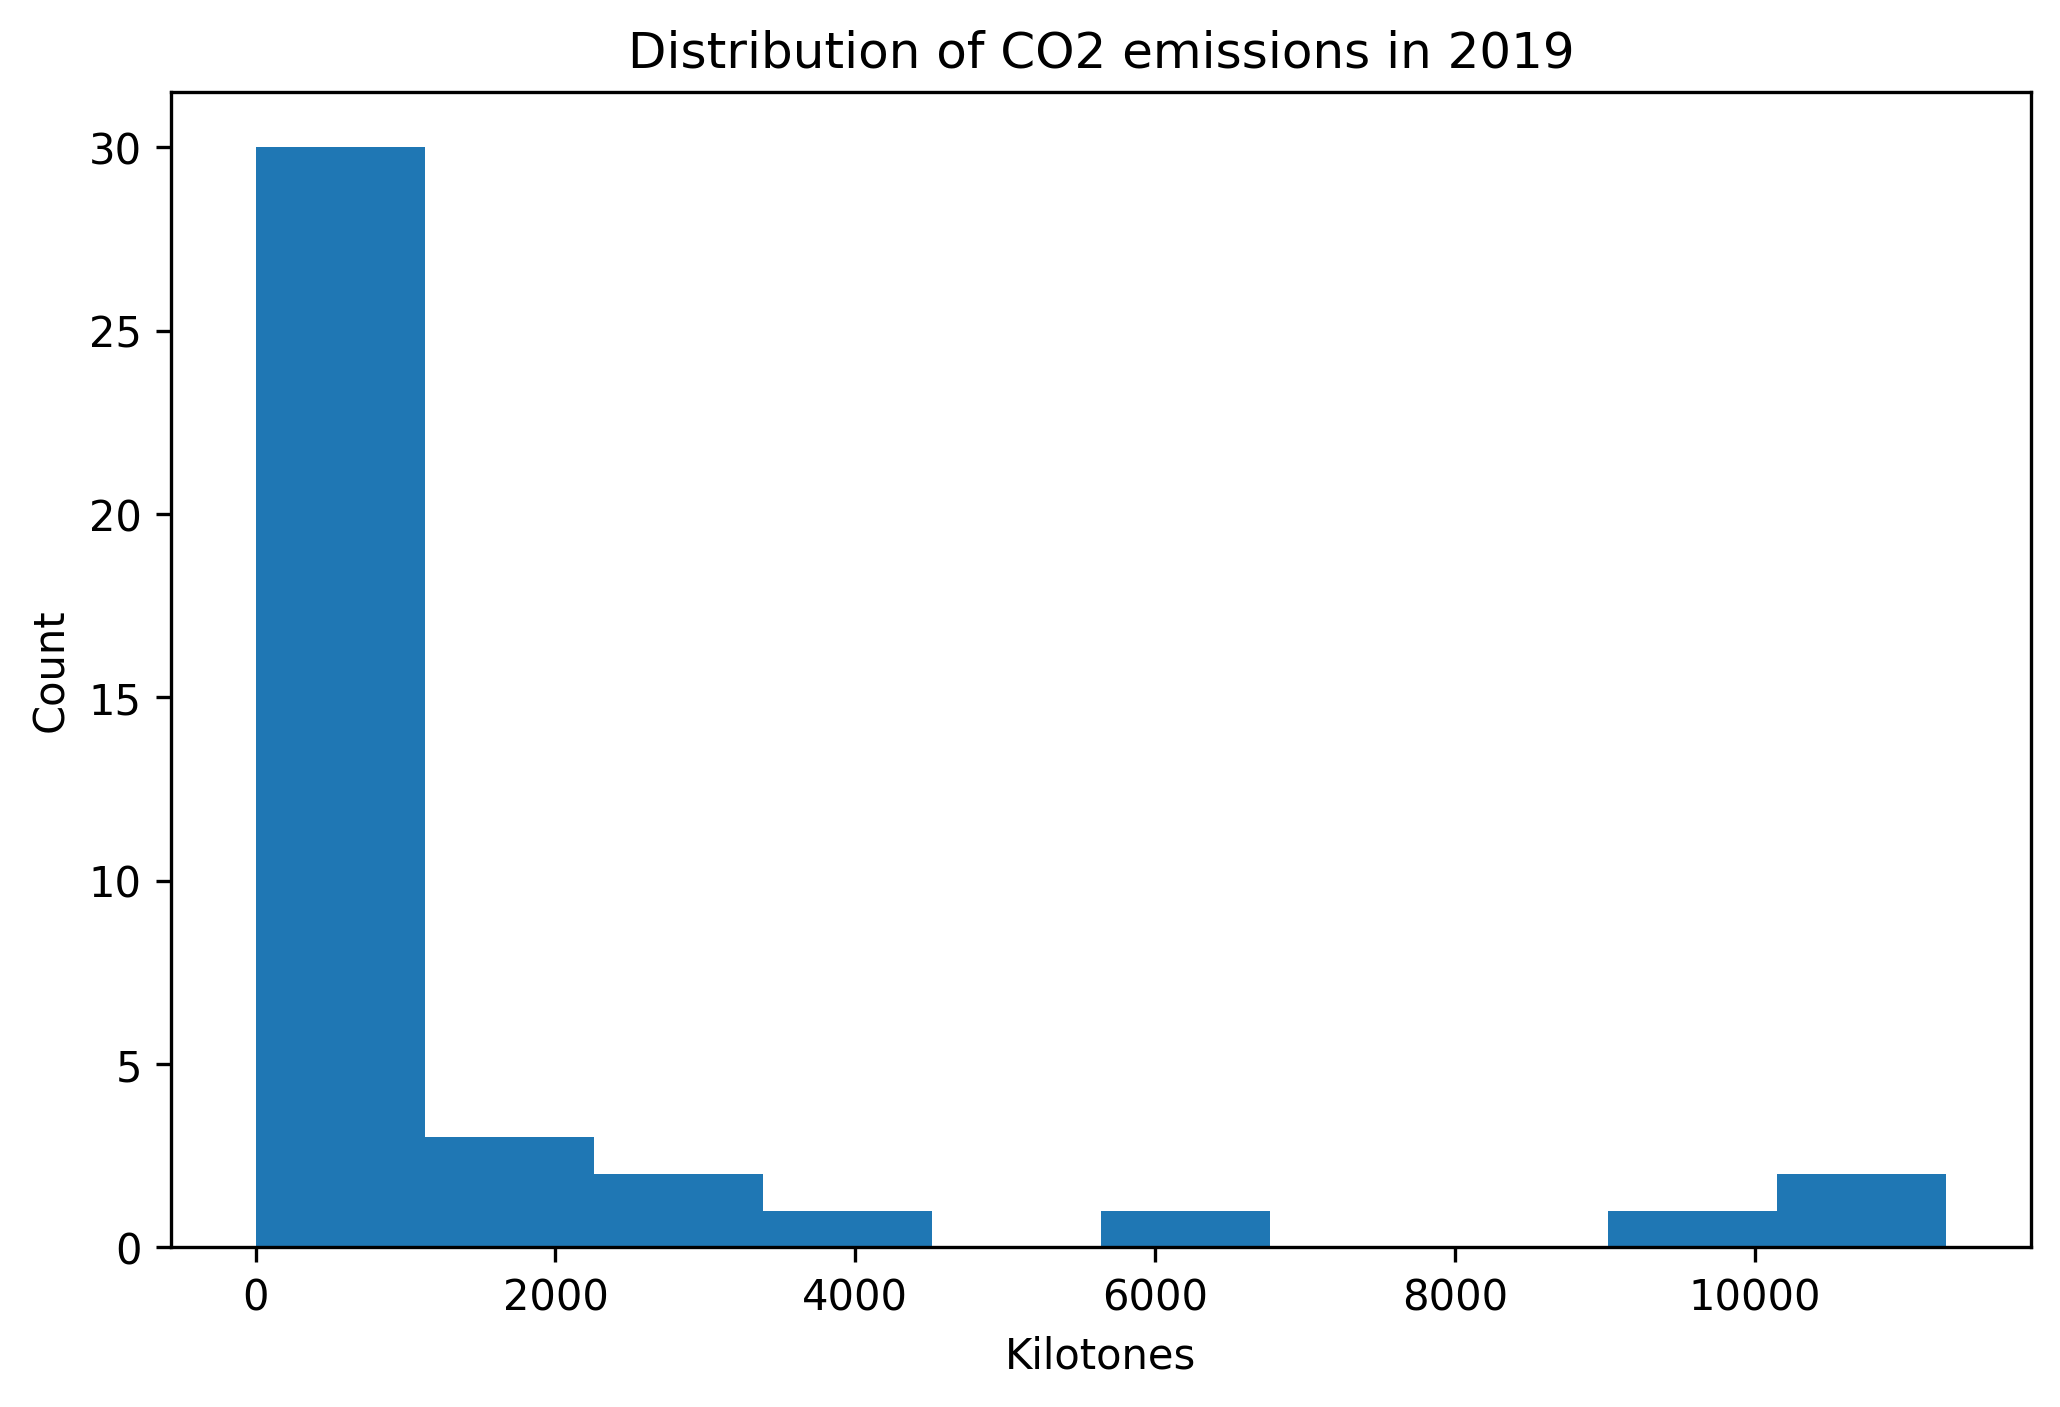

In [10]:
## 2019 df
CO2_Am_2019_df = pd.concat([CO2_CAC_df[CO2_CAC_df["Year"] == 2019], CO2_SAm_df[CO2_SAm_df["Year"] == 2019]], ignore_index = True)
CO2_SAm_df[CO2_SAm_df["Year"] == 2019].copy()

## GDP dictionary
GDF2019_dic = {"Mexico" : 22215, "Antigua and Barbuda" : 21889, "Belize" : 7147, \
               "British Virgin Islands" : 47914, "Costa Rica" : 24489, "Cuba" : 9139, \
               "Dominica" : 14490, "Dominican Republic" : 23982, "El Salvador" : 10580, \
               "Equatorial Guinea" : 7317, "Grenada" : 18292, "Guadeloupe" : 9141, \
               "Guatemala" : 9911, "Haiti" : 3188, "Honduras" : 6740, "Jamaica": 11802, \
               "Curaçao" : 19024, "Aruba" : 39508, "Sint Maarten (Dutch part)" : 25569, \
               "Bonaire, Sint Eustatius and Saba" : 24300, "Nicaragua" : 7071, "Panama" : 36084, \
               "Saint Kitts and Nevis" : 27608, "Anguilla" : 25337, "Saint Lucia" : 16509, \
               "Saint Vincent and the Grenadines" : 15505, "Trinidad and Tobago" : 29884, \
               "Turks and Caicos Islands" : 27795, "Argentina" : 25822, "Bolivia (Plurinational State of)" : 9855, \
               "Brazil" : 17207, "Chile" : 28526, "Colombia" : 18225, "Ecuador" : 12663, \
               "Falkland Islands (Malvinas)" : 11118, "French Guiana" : 17375, "Guyana" : 38258, \
               "Paraguay" : 14429, "Peru" : 15035, "Suriname" : 17300, \
               "Uruguay" : 26662, "Venezuela (Bolivarian Republic of)" : 2299}

## Add GDP to df    
CO2_Am_2019_df["GDP"] = CO2_Am_2019_df["AreaName"].apply(lambda x: [GDF2019_dic[i] for i in GDF2019_dic if i == x])

### Correct data type
CO2_Am_2019_df["GDP"] = CO2_Am_2019_df["GDP"].astype(str)  
CO2_Am_2019_df["GDP"] = CO2_Am_2019_df["GDP"].str.replace("[","")
CO2_Am_2019_df["GDP"] = CO2_Am_2019_df["GDP"].str.replace("]","") 
CO2_Am_2019_df["GDP"] = CO2_Am_2019_df["GDP"].astype(int)


## Explore correlation

### Distribution
plt.rcParams['figure.figsize'] = [8, 5]
plt.hist(CO2_Am_2019_df["Value"])
plt.title("Distribution of CO2 emissions in 2019")
plt.xlabel("Kilotones")
plt.ylabel("Count")
plt.show()

**Figure 4.** Distribution of CO2 emissions in American countries for 2019.

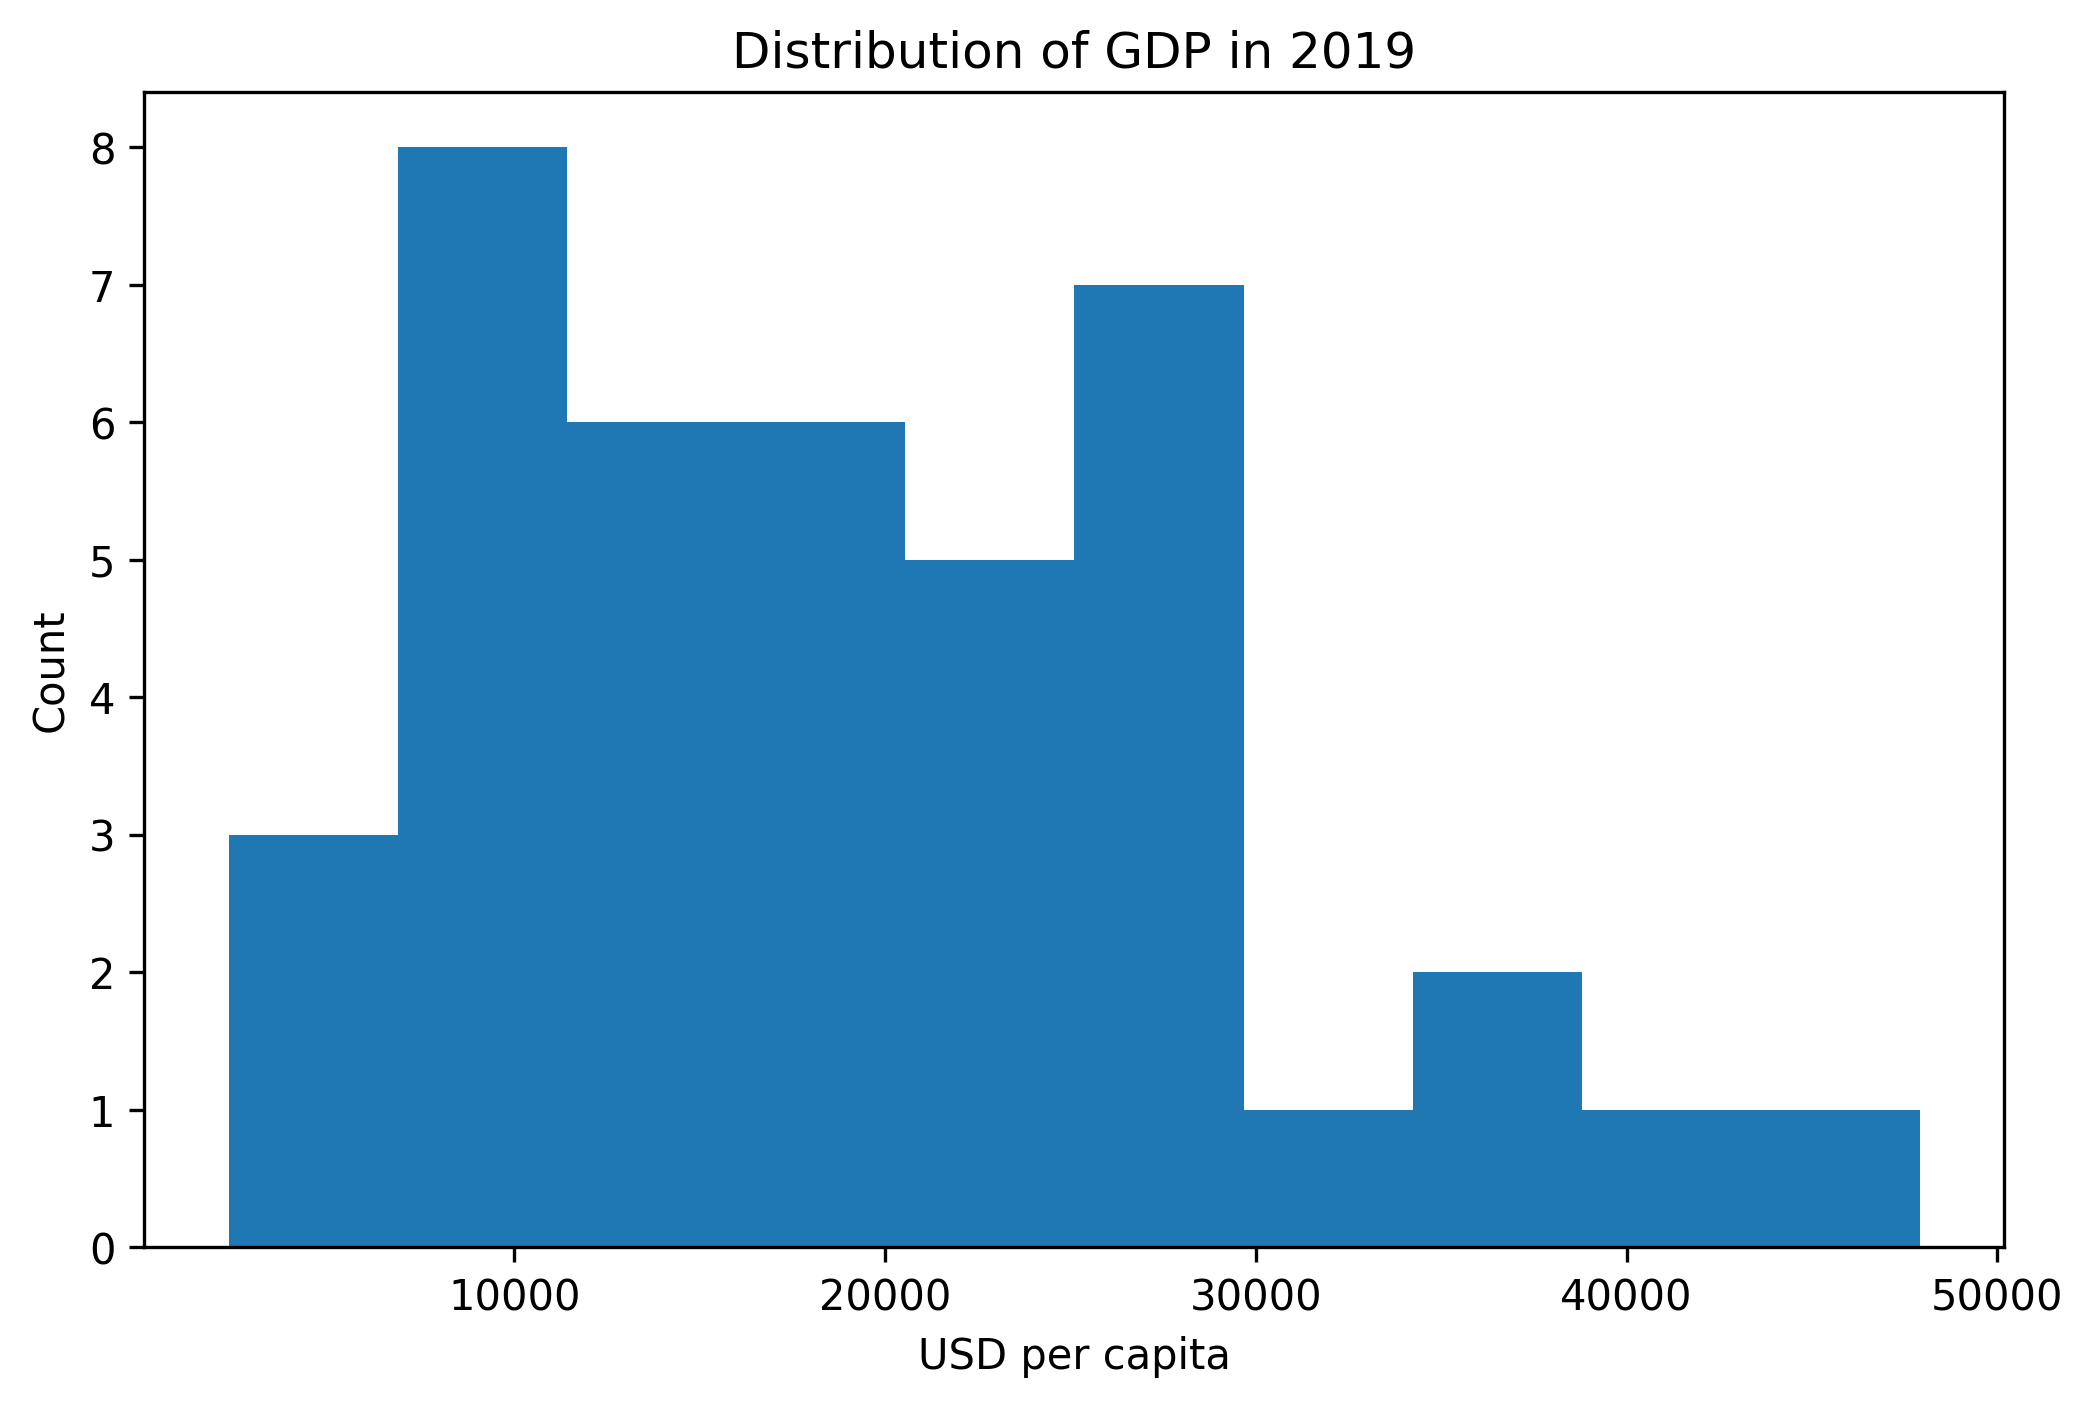

In [11]:
plt.hist(CO2_Am_2019_df["GDP"])
plt.title("Distribution of GDP in 2019")
plt.xlabel("USD per capita")
plt.ylabel("Count")
plt.show()

**Figure 5.** Distribution of GDP per capita in American countries for 2019.

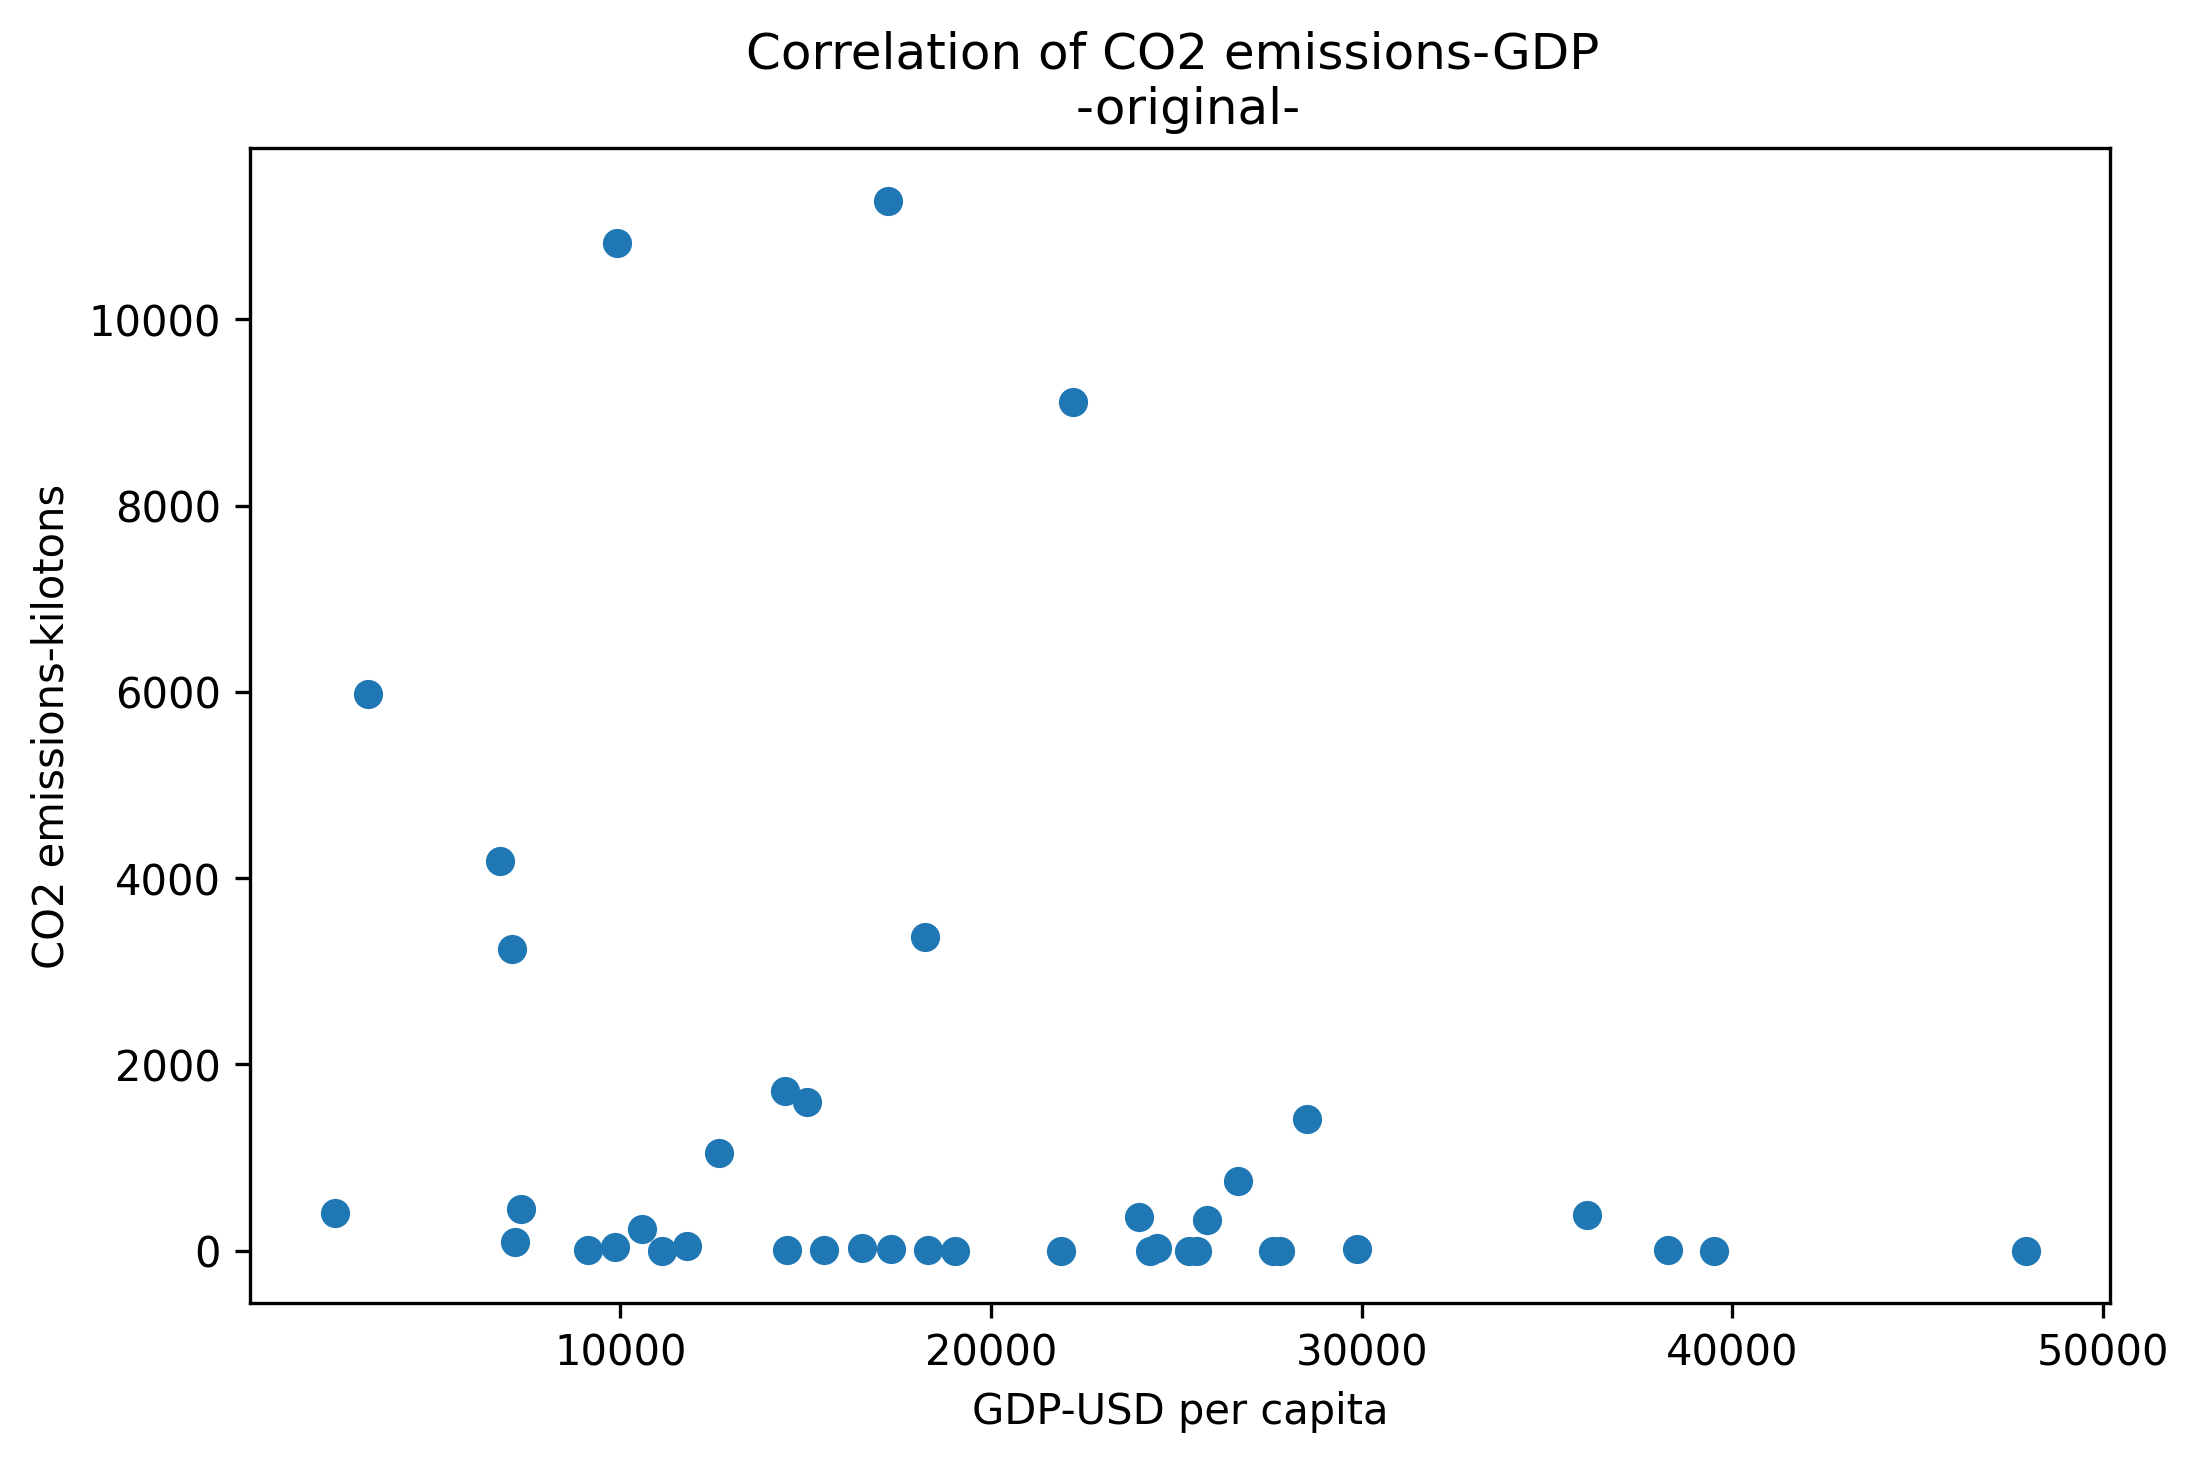

-0.2516942857923694


In [12]:
### Plot
fig, ax = plt.subplots()
ax.scatter(CO2_Am_2019_df["GDP"], CO2_Am_2019_df["Value"])
plt.title("Correlation of CO2 emissions-GDP \n -original-")
plt.xlabel("GDP-USD per capita")
plt.ylabel("CO2 emissions-kilotons")
plt.show()

### Coeficient
print(CO2_Am_2019_df["GDP"].corr(CO2_Am_2019_df["Value"]))

**Figure 6.** Correlation between GDP and CO2 emissions. 

Because of the skewness of the data, a log transformation will be explored.

In [13]:
## Create column with log transformation of CO2 emissions
CO2_Am_2019_df["log_Value"] = np.log(CO2_Am_2019_df["Value"])

## Outliers

### GDP outliers - index 2
#iqr = iqr(CO2_Am_2019_df["GDP"])
#lower_threshold = np.quantile(CO2_Am_2019_df["GDP"], 0.25) - 1.5 * iqr
#upper_threshold = np.quantile(CO2_Am_2019_df["GDP"], 0.75) + 1.5 * iqr
#outliers_Am_2019_df = CO2_Am_2019_df[(CO2_Am_2019_df["GDP"] < lower_threshold) | (CO2_Am_2019_df["GDP"] > upper_threshold)]

### DF without outlier
#CO2_Am_2019_df_woOL = CO2_Am_2019_df.loc[CO2_Am_2019_df["GDP"] < upper_threshold]

## Correlation with transformed data

### Plot
#fig, ax = plt.subplots()
#ax.scatter(CO2_Am_2019_df_woOL["GDP"], CO2_Am_2019_df_woOL["log_Value"])
#plt.title("Correlation of CO2 emissions-GDP \n -log transformed, without outliers-")
#plt.xlabel("GDP-USD per capita")
#plt.ylabel("CO2 emissions-kilotons (log transformed)")
#plt.show()

### Coeficient
#print(CO2_Am_2019_df_woOL["GDP"].corr(CO2_Am_2019_df_woOL["log_Value"]))

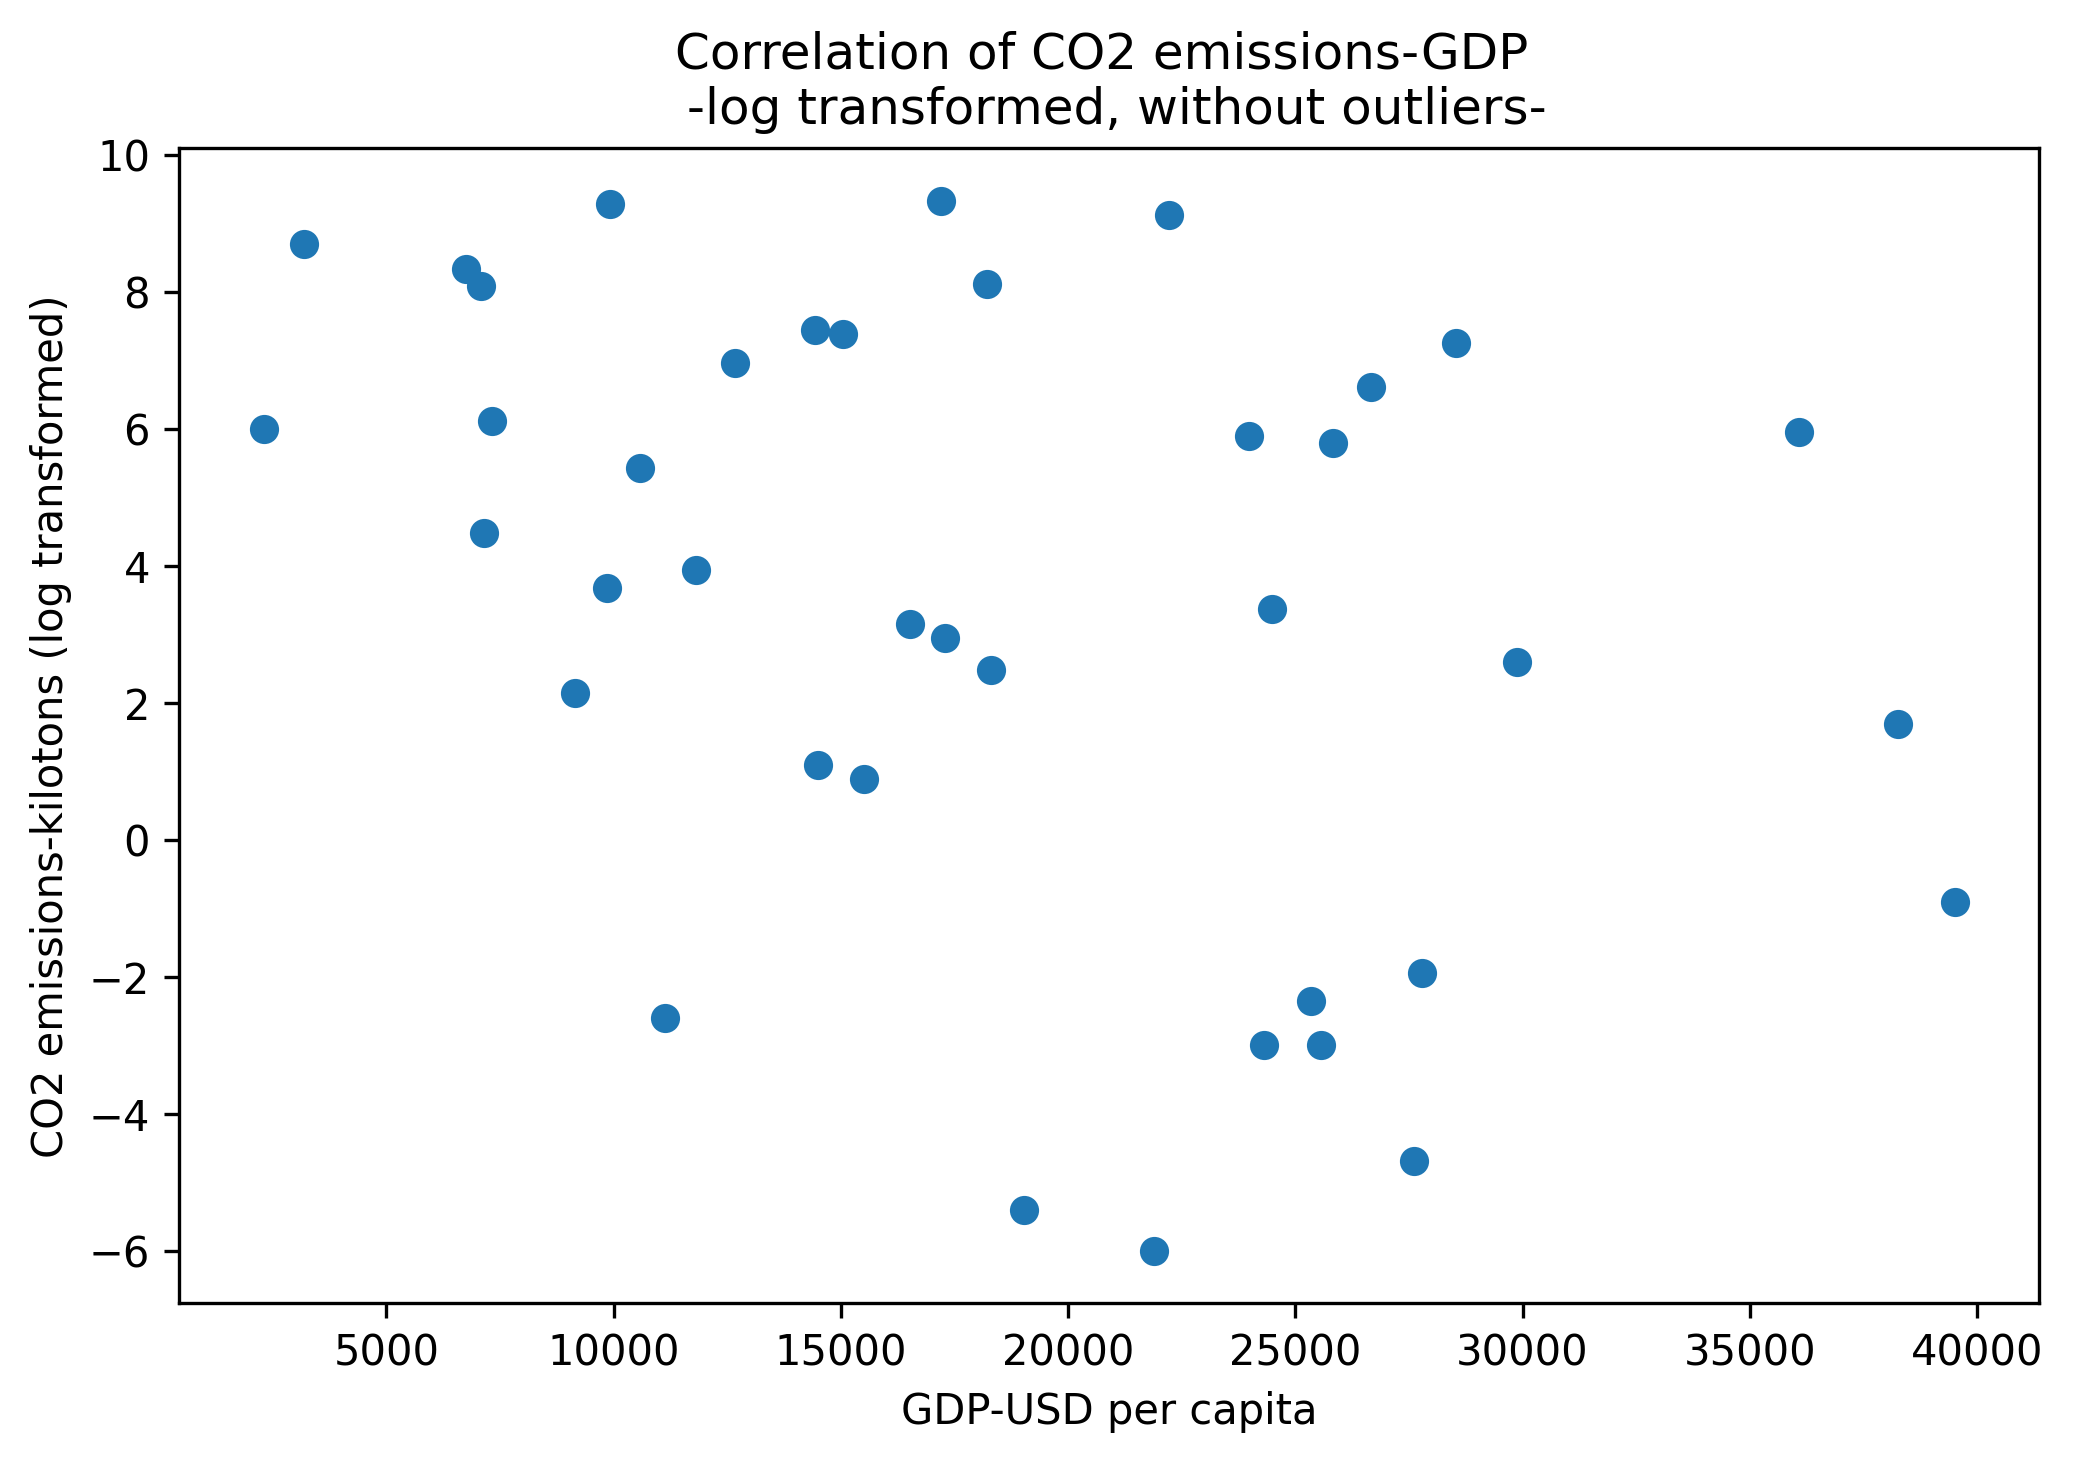
-0.36

**Figure 7.** Correlation between GDP (log transformed) and CO2 emissions. 


     AreaName  Country_overall_median
10  Guatemala             6171.189399
11      Haiti             4552.279867
12   Honduras             4467.932214
14     Mexico             9785.843850
19  Nicaragua             3025.937202
29     Brazil            10992.169623
31   Colombia             3479.447690


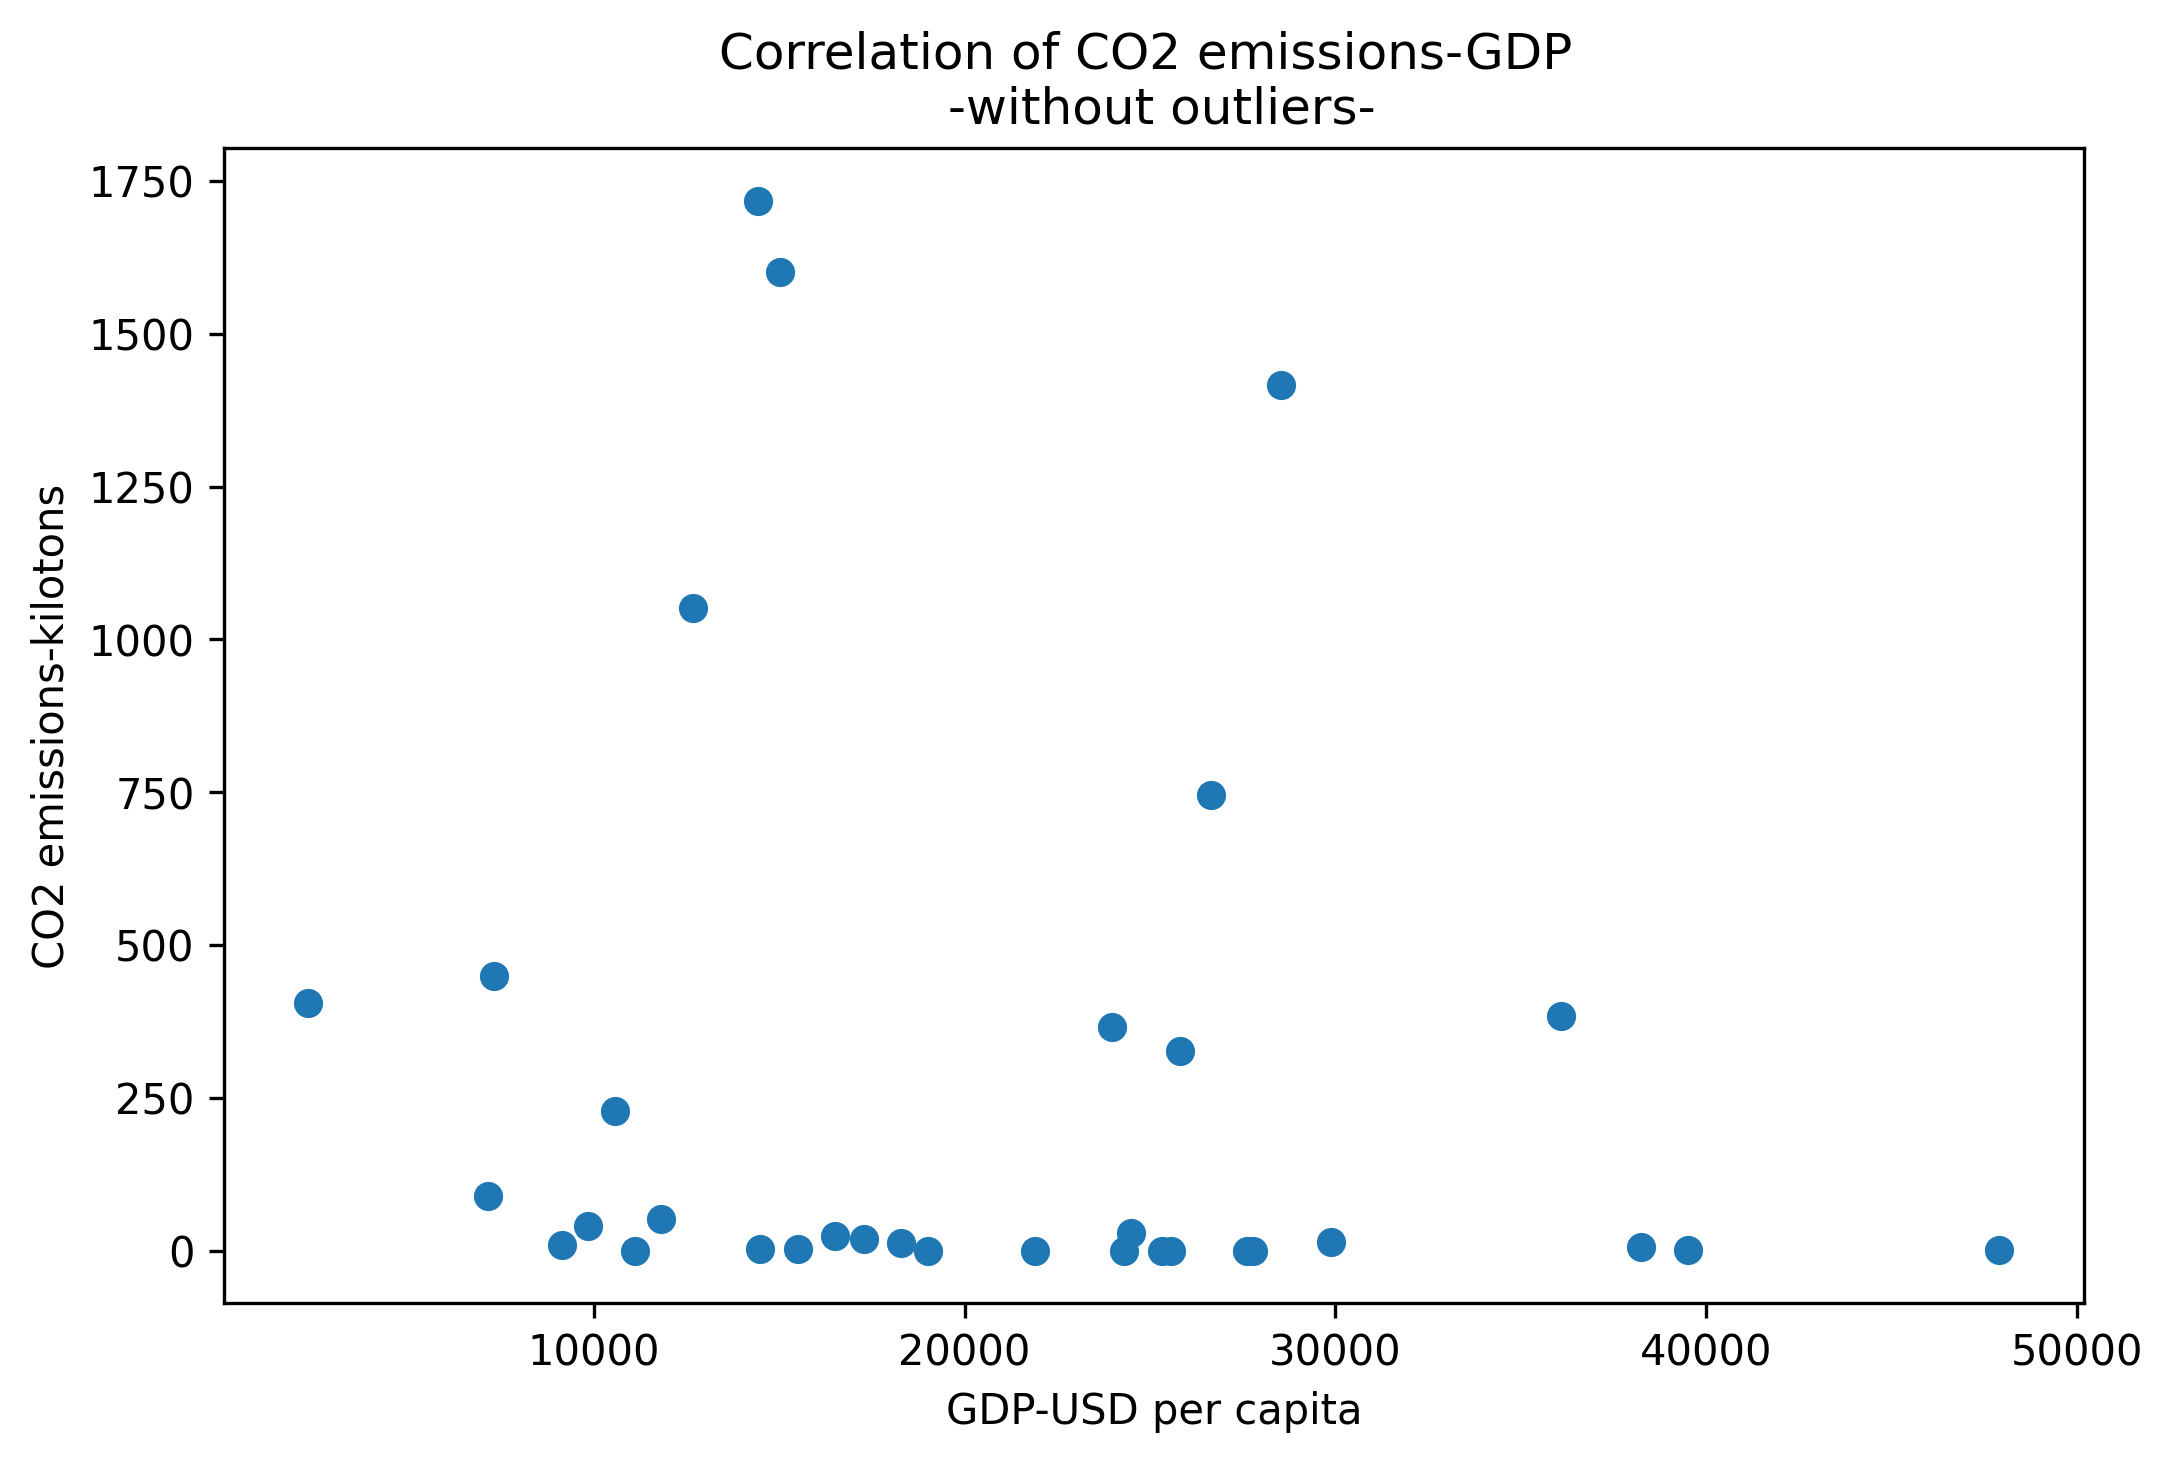

-0.13960193990265224


In [14]:
## Correlation with original data, removing CO2 outliers 

### CO2 outliers - index 2
iqr = iqr(CO2_Am_2019_df["Value"])
lower_threshold = np.quantile(CO2_Am_2019_df["Value"], 0.25) - 1.5 * iqr
upper_threshold = np.quantile(CO2_Am_2019_df["Value"], 0.75) + 1.5 * iqr
outliers_CO2_Am_2019_df = CO2_Am_2019_df[(CO2_Am_2019_df["Value"] < lower_threshold) | (CO2_Am_2019_df["Value"] > upper_threshold)]
print(outliers_CO2_Am_2019_df[["AreaName", "Country_overall_median"]]) 

### DF without CO2 outliers
CO2_Am_2019_df_woOL_CO2 = CO2_Am_2019_df.loc[CO2_Am_2019_df["Value"] < upper_threshold]
CO2_Am_2019_df_woOL_CO2 = CO2_Am_2019_df_woOL_CO2.loc[CO2_Am_2019_df["Value"] > lower_threshold]

### Plot
fig, ax = plt.subplots()
ax.scatter(CO2_Am_2019_df_woOL_CO2["GDP"], CO2_Am_2019_df_woOL_CO2["Value"])
plt.title("Correlation of CO2 emissions-GDP \n -without outliers-")
plt.xlabel("GDP-USD per capita")
plt.ylabel("CO2 emissions-kilotons")
plt.show()

### Coeficient
print(CO2_Am_2019_df_woOL_CO2["GDP"].corr(CO2_Am_2019_df_woOL_CO2["Value"]))


**Figure 8.** Correlation between GDP and CO2 emissions without outliers. The exploration of the outliers shows that they correspond to the seven countires with the highest emissions.

To have a better understanding of the correlation, countries will be categorized as low- or high-emissions.

Text(0.05, 0.04, 'r = -0.35')

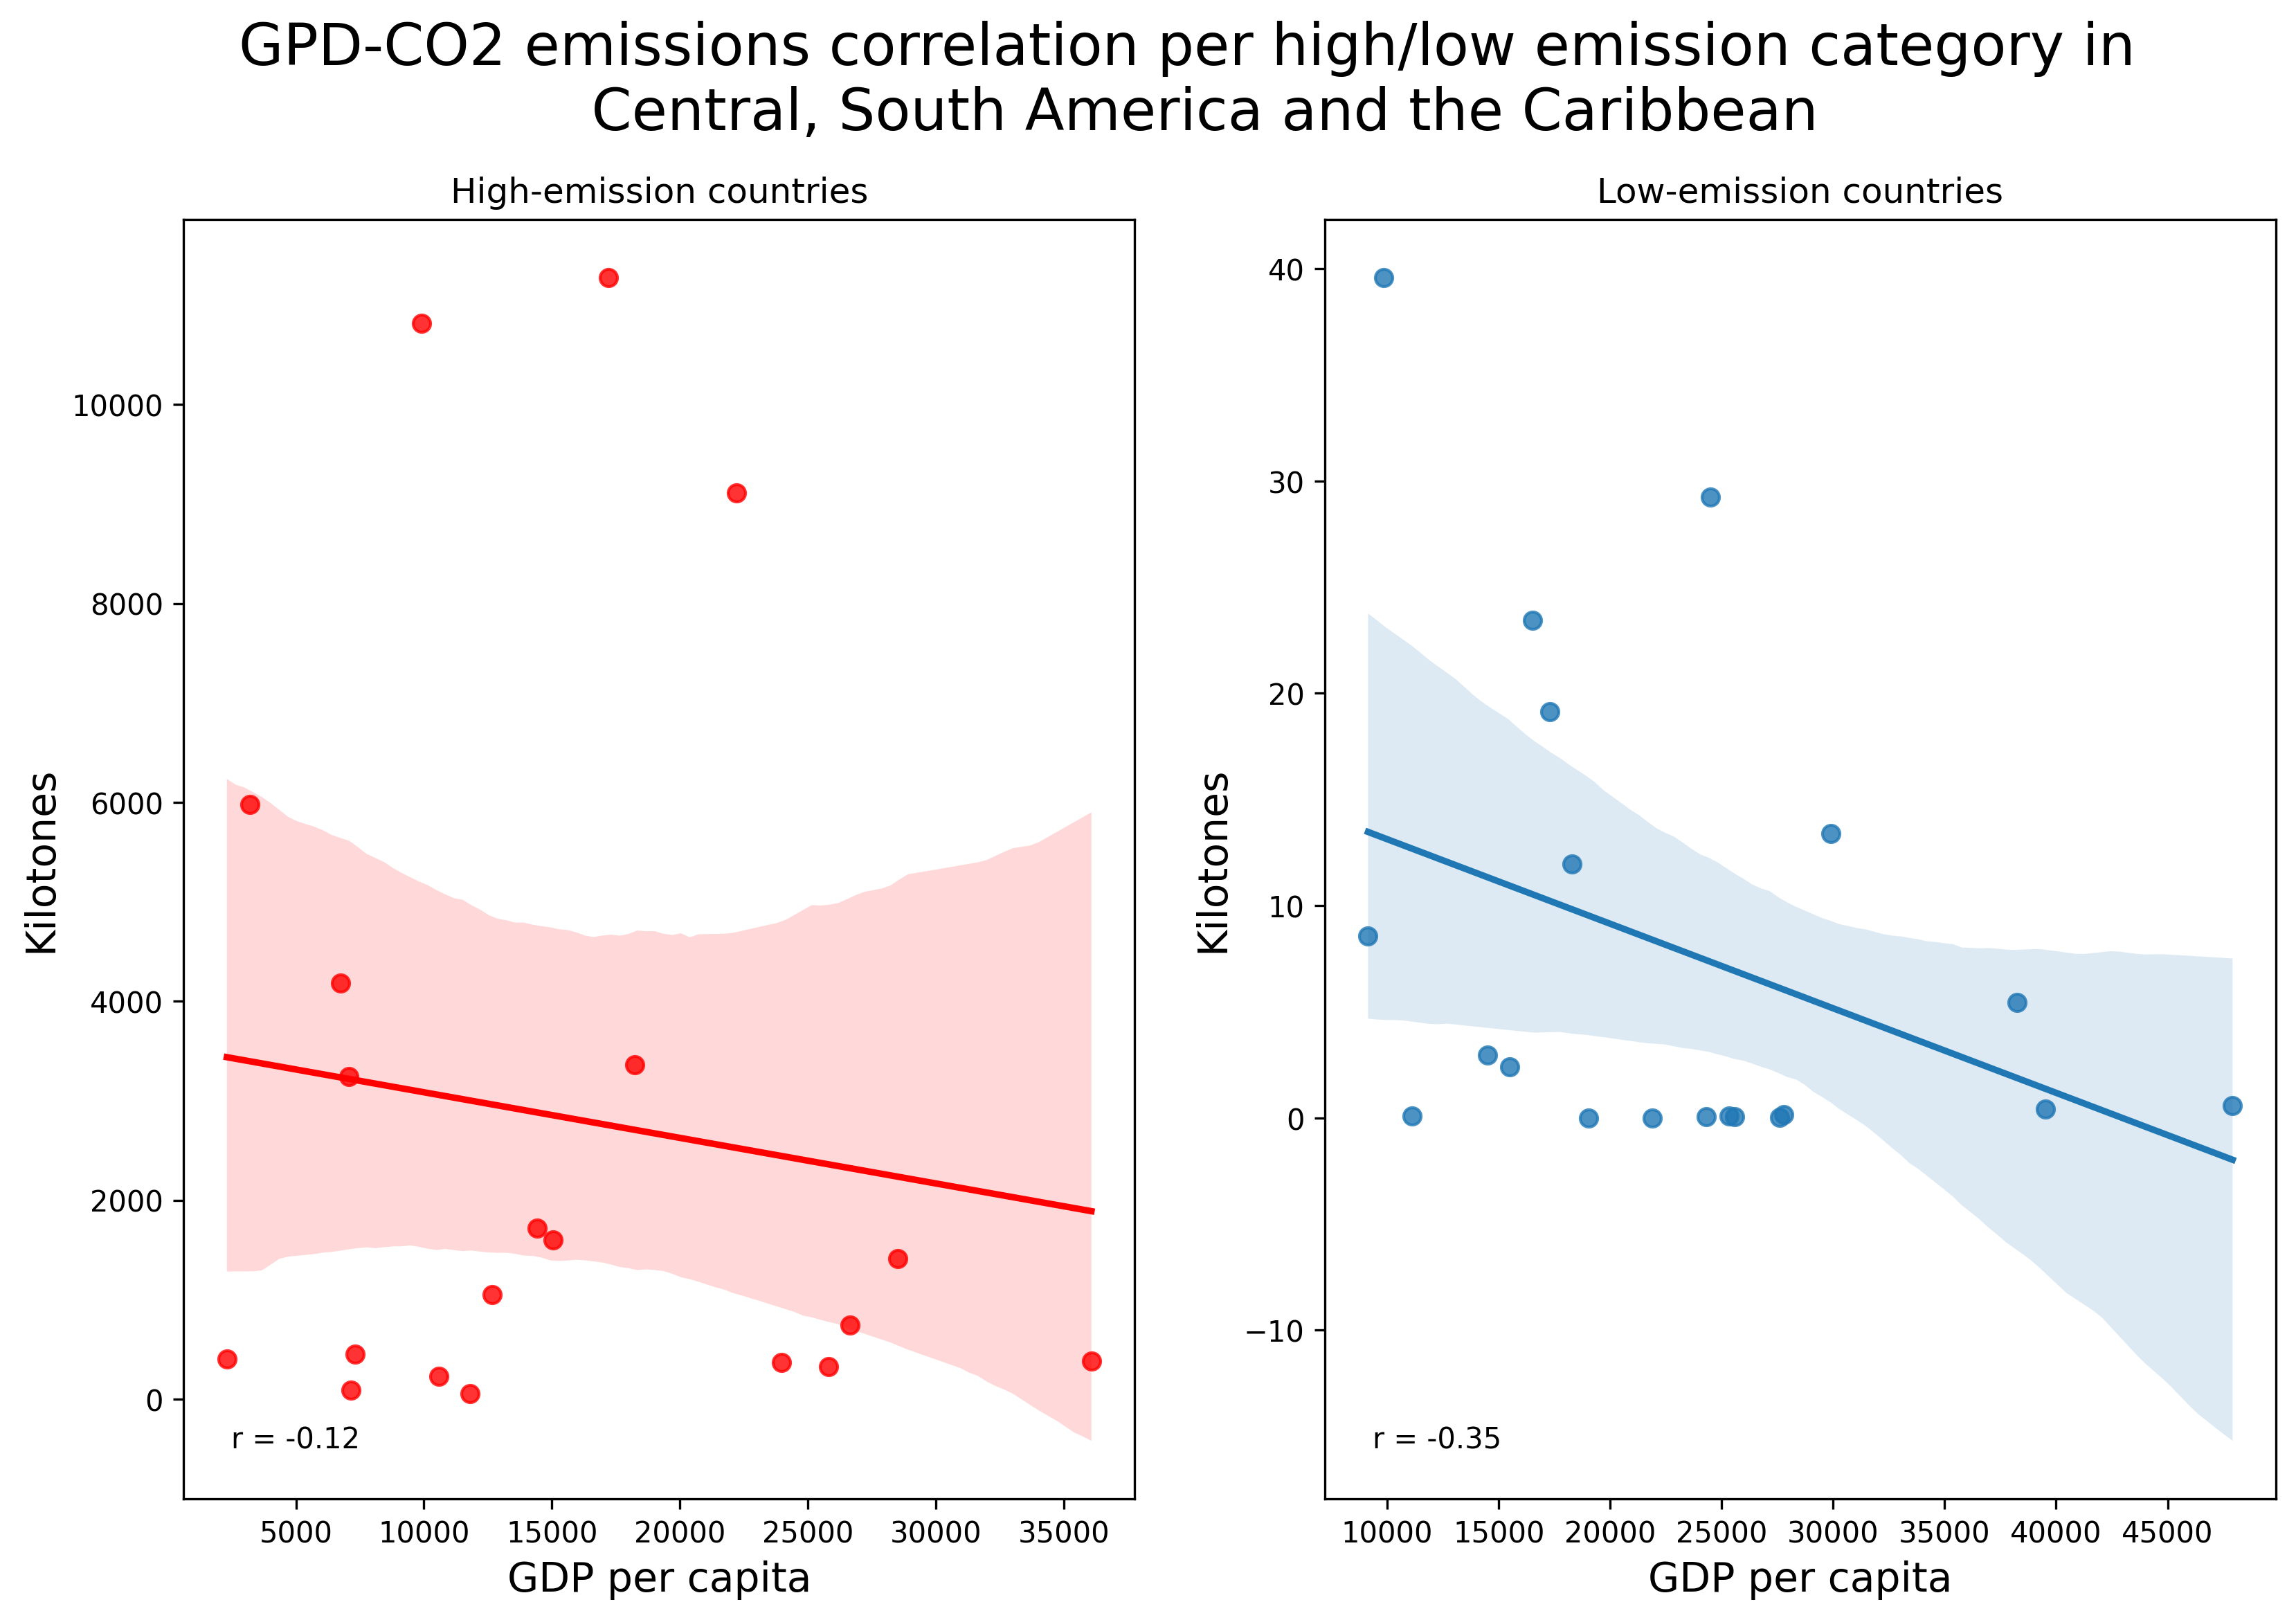

In [16]:
### Correlation according to high-low emissions

#### Median 
median_CO2_Am = CO2_Am_2019_df["Value"].median()

#### Add category according to median
CO2_Am_2019_df["Median_emission_Am_cat"] = np.where(CO2_Am_2019_df["Value"] > median_CO2_Am, "High", "Low")

#### Correlation per emission category
CO2_Am_2019_df.groupby("Median_emission_Am_cat")[["GDP","Value"]].corr().unstack().iloc[:,1]

#### Plot per category

##### Data
#sns.lmplot(x = "GDP", y = "Value", data = CO2_Am_2019_df, hue = "Median_emission_Am_cat", palette = ["blue", "red"])

CO2low_Am_2019_df = CO2_Am_2019_df[CO2_Am_2019_df["Median_emission_Am_cat"] == "Low"]
CO2high_Am_2019_df = CO2_Am_2019_df[CO2_Am_2019_df["Median_emission_Am_cat"] == "High"]

##### Plot
fig,(ax1,ax2) =plt.subplots(1,2,figsize=(13, 8))
fig.suptitle("GPD-CO2 emissions correlation per high/low emission category in \n Central, South America and the Caribbean", fontsize=20, y=1)
sns.regplot(ax=ax1, x = "GDP", y = "Value", data = CO2high_Am_2019_df, scatter_kws={"color": "red"}, line_kws={"color": "red"}).set_xlabel("GDP per capita", fontsize=14)
sns.regplot(ax=ax2, x = "GDP", y = "Value", data = CO2low_Am_2019_df).set_xlabel("GDP per capita", fontsize=14)
ax1.set_title("High-emission countries")
ax2.set_title("Low-emission countries")
ax1.set_ylabel("Kilotones", fontsize=14)
ax2.set_ylabel("Kilotones", fontsize=14)
ax1.text(0.05, 0.04,'r = -0.12', transform = ax1.transAxes, fontsize=10)
ax2.text(0.05, 0.04,'r = -0.35', transform = ax2.transAxes, fontsize=10)

**Figure 9.** Correlation between GDP per capita and CO2 emissions in non-developed countries in America in 2019. For both categories, the correlation is negative. Nevertheless, it is a weak correlation among high-emission countries, while it is moderate for low emission countries. 

# Conclusions:

- Considering the shape of the line for CO2 emissions across time in world regions, considering only time would be misleading to perform predictions about CO2 emissions. Nevertheless, two regions could be considered challenging in the future: 

   -- Africa, which presents an increase in CO2 emissions among its high-emission countries

   -- South-Eastern Asia, where the low-emission countries emissions are as high as the ones from high-emission countries in Oceania and Central America and the Caribbean.

- Among the non-developed countries in America, the higher the GDP, the lower the CO2 emissions. This is true overall for the low-emission countries. To understand this relationship, and the difference between low- and high-emission countries, additional factors should be considered such as economic diversification, consumerism culture, and main economic activities.
